In [15]:
##################################
### Import the usual libraries ###
##################################

### Numpy
import numpy as np

### Astropy
import astropy

#Astropy FITS/Table handling
from astropy.io import fits, ascii
from astropy.table import Table, Column

#astropy coorindates/units
from astropy.coordinates import SkyCoord
import astropy.constants as const
import astropy.units as u

### Pandas
import pandas as pd

### fitting
import statsmodels.api as sm

### PCA
from sklearn.decomposition import PCA, KernelPCA

### Model generation
import itertools as it

### Matplotlib
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams.update({'font.size': 18}) #make plots more readable

# ### Yumi's RA/DEC ---> Magellanic Stream Coorindates
import MagellanicStream as ms

### Functions used in this code
import age_functions as afunc

### Stuff Writtten by A Really Cool Professor
from dlnpyutils import utils as dln

### Other
import warnings
warnings.filterwarnings('ignore')

from tqdm import tqdm_notebook

In [16]:
#######################
### Age of Universe ###
#######################

'''
@article{aghanim2020planck,
title={Planck 2018 results-VI. Cosmological parameters},
author={Aghanim, Nabila and Akrami, Yashar and Ashdown, M and Aumont, J and Baccigalupi, C and 
Ballardini, M and Banday, AJ and Barreiro, RB and Bartolo, N and Basak, S and others},
journal={Astronomy \& Astrophysics},
volume={641},
pages={A6},
year={2020},
publisher={EDP sciences}
}
'''

# Table 2
#13.787 ± 0.020 Gyr

ageU = 13.787*10**9 # logAge = ~10.14

In [17]:
#####################
### Import PARSEC ###
#####################

### A(V) = 0.0
av0 = pd.read_csv('/Users/joshuapovick/Desktop/Research/parsec/parsec_no_av.dat',comment='#',
                  names=["Zini","MH","logAge","Mini","int_IMF","Mass","logL","logTe","logg","label","McoreTP",
                         "C_O","period0","period1","period2","period3","period4","pmode","Mloss","tau1m","X","Y",
                         "Xc","Xn","Xo","Cexcess","Z","mbolmag","Gmag","G_BPmag","G_RPmag","B_Tmag","V_Tmag",
                         "Jmag","Hmag","Ksmag"],sep='\s+')
av0 = Table.from_pandas(av0)
av0['AJAV'] = np.zeros(len(av0))
av0['AHAV'] = np.zeros(len(av0))
av0['AKAV'] = np.zeros(len(av0))

rgb0 = np.where(av0['label']==3)
av0 = av0[rgb0]

### A(V) = 0.5
av05 = pd.read_csv('/Users/joshuapovick/Desktop/Research/parsec/parsec_05_av.dat',comment='#',
                  names=["Zini","MH","logAge","Mini","int_IMF","Mass","logL","logTe","logg","label","McoreTP",
                         "C_O","period0","period1","period2","period3","period4","pmode","Mloss","tau1m","X","Y",
                         "Xc","Xn","Xo","Cexcess","Z","mbolmag","Gmag","G_BPmag","G_RPmag","B_Tmag","V_Tmag",
                         "Jmag","Hmag","Ksmag"],sep='\s+')
av05 = Table.from_pandas(av05)
# av05['AJAV'] = np.zeros(len(av0))
# av05['AHAV'] = np.zeros(len(av0))
# av05['AKAV'] = np.zeros(len(av0))

rgb05 = np.where(av0['label']==3)
av05 = av05[rgb0]

### A(V) = 1.0
av1 = pd.read_csv('/Users/joshuapovick/Desktop/Research/parsec/parsec_1_av.dat',comment='#',
                  names=["Zini","MH","logAge","Mini","int_IMF","Mass","logL","logTe","logg","label","McoreTP",
                         "C_O","period0","period1","period2","period3","period4","pmode","Mloss","tau1m","X","Y",
                         "Xc","Xn","Xo","Cexcess","Z","mbolmag","Gmag","G_BPmag","G_RPmag","B_Tmag","V_Tmag",
                         "Jmag","Hmag","Ksmag"],sep='\s+')
av1 = Table.from_pandas(av1)
av1['AVAV'] = np.ones(len(av1))

rgb1 = np.where(av1['label']==3)
av1 = av1[rgb1]

# Effective Wavelength As Reported by PARSEC

Filter	G	G_BP	G_RP	B_T	V_T	J	H	Ks

λeff (Å)	6437.70	5309.57	7709.85	4265.42	5332.38	12329.79	16395.59	21522.05

ωeff (Å)	3700	2080	2540	640	1060	1850	2125	2400

Aλ/AV	0.85926	1.06794	0.65199	1.35552	1.05047	0.29434	0.18128	0.11838

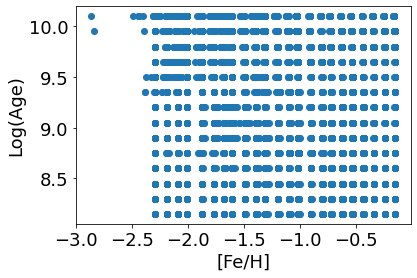

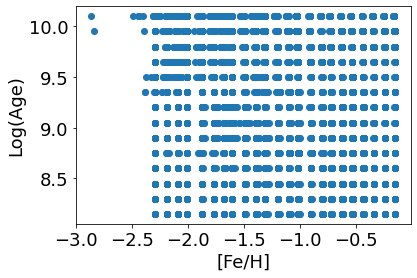

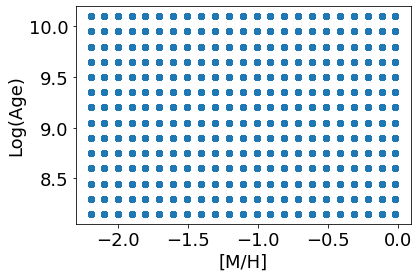

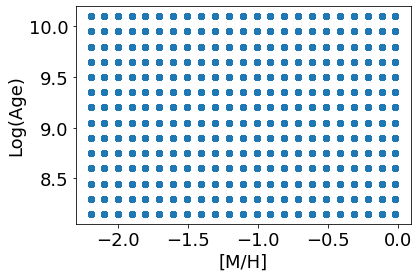

In [18]:
### Metallicity-Log(Age) Grid

plt.scatter(np.log10(av0['Z']/0.02),av0['logAge'])
plt.xlabel(r'[Fe/H]')
plt.ylabel(r'Log(Age)')
plt.show()

plt.scatter(np.log10(av1['Z']/0.02),av1['logAge'])
plt.xlabel(r'[Fe/H]')
plt.ylabel(r'Log(Age)')
plt.show()

plt.scatter(av0['MH'],av0['logAge'])
plt.xlabel(r'[M/H]')
plt.ylabel(r'Log(Age)')
plt.show()

plt.scatter(av1['MH'],av1['logAge'])
plt.xlabel(r'[M/H]')
plt.ylabel(r'Log(Age)')
plt.show()

<font size='45'>
    <b>
        Teff Color
    </b>
</font>

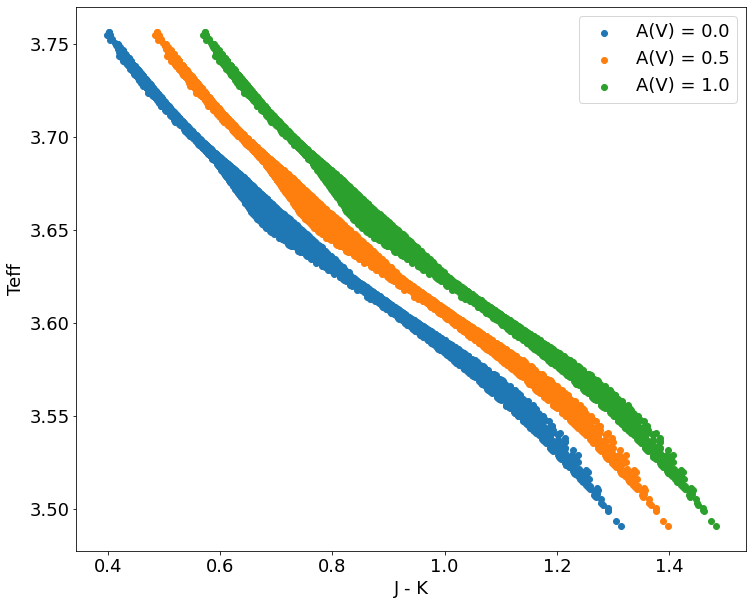

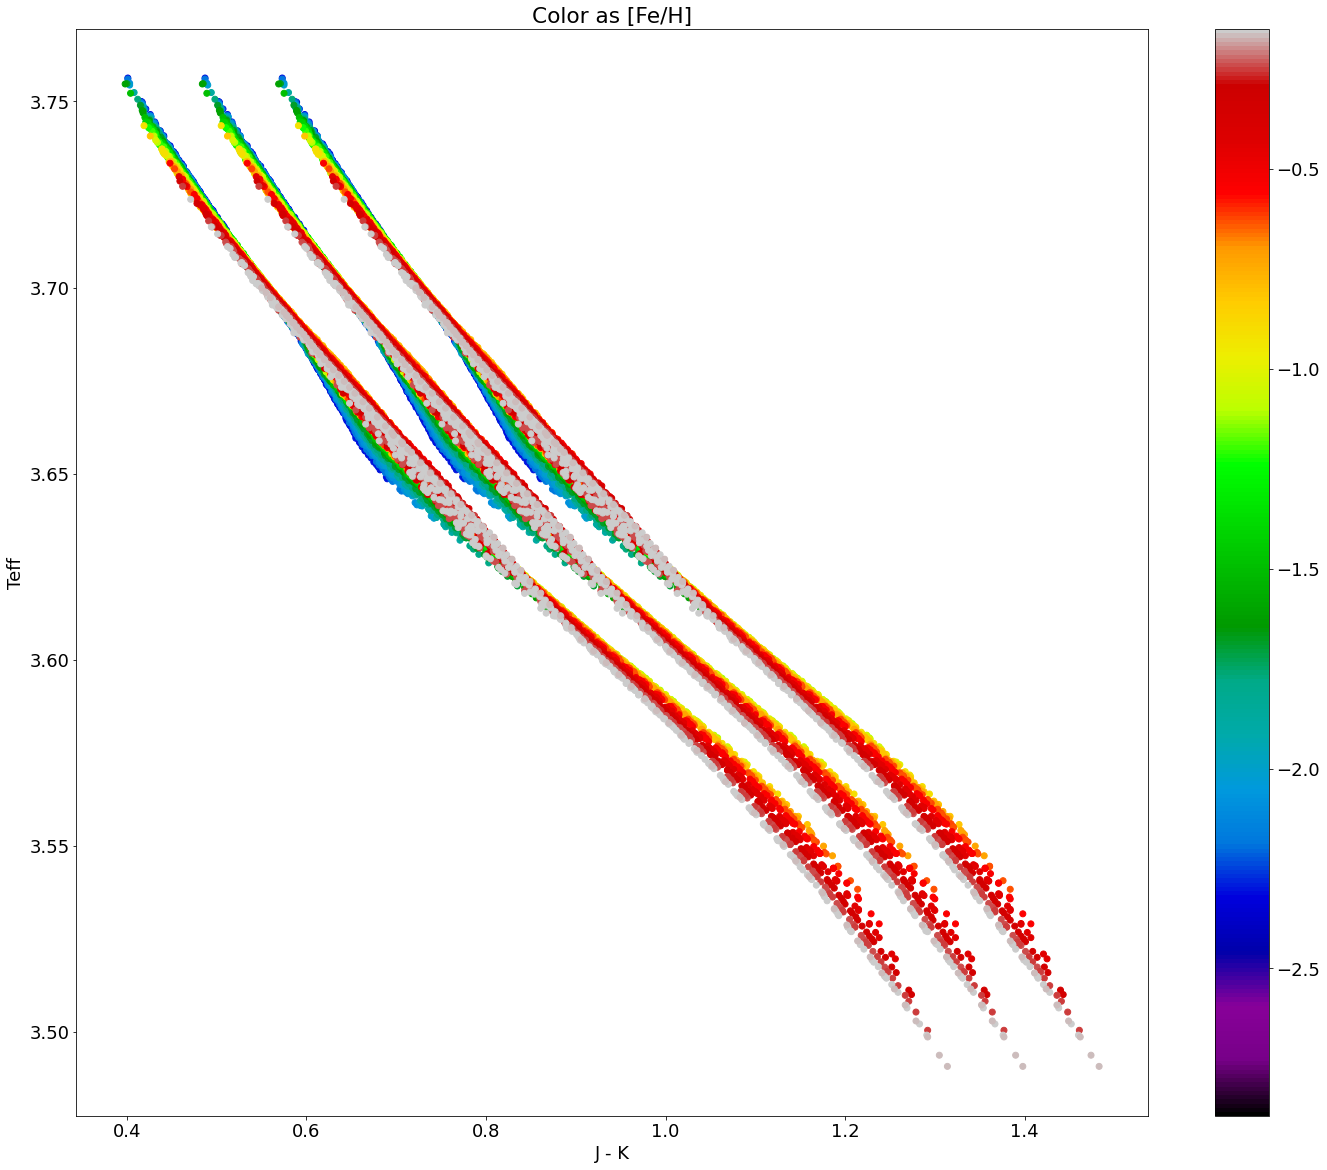

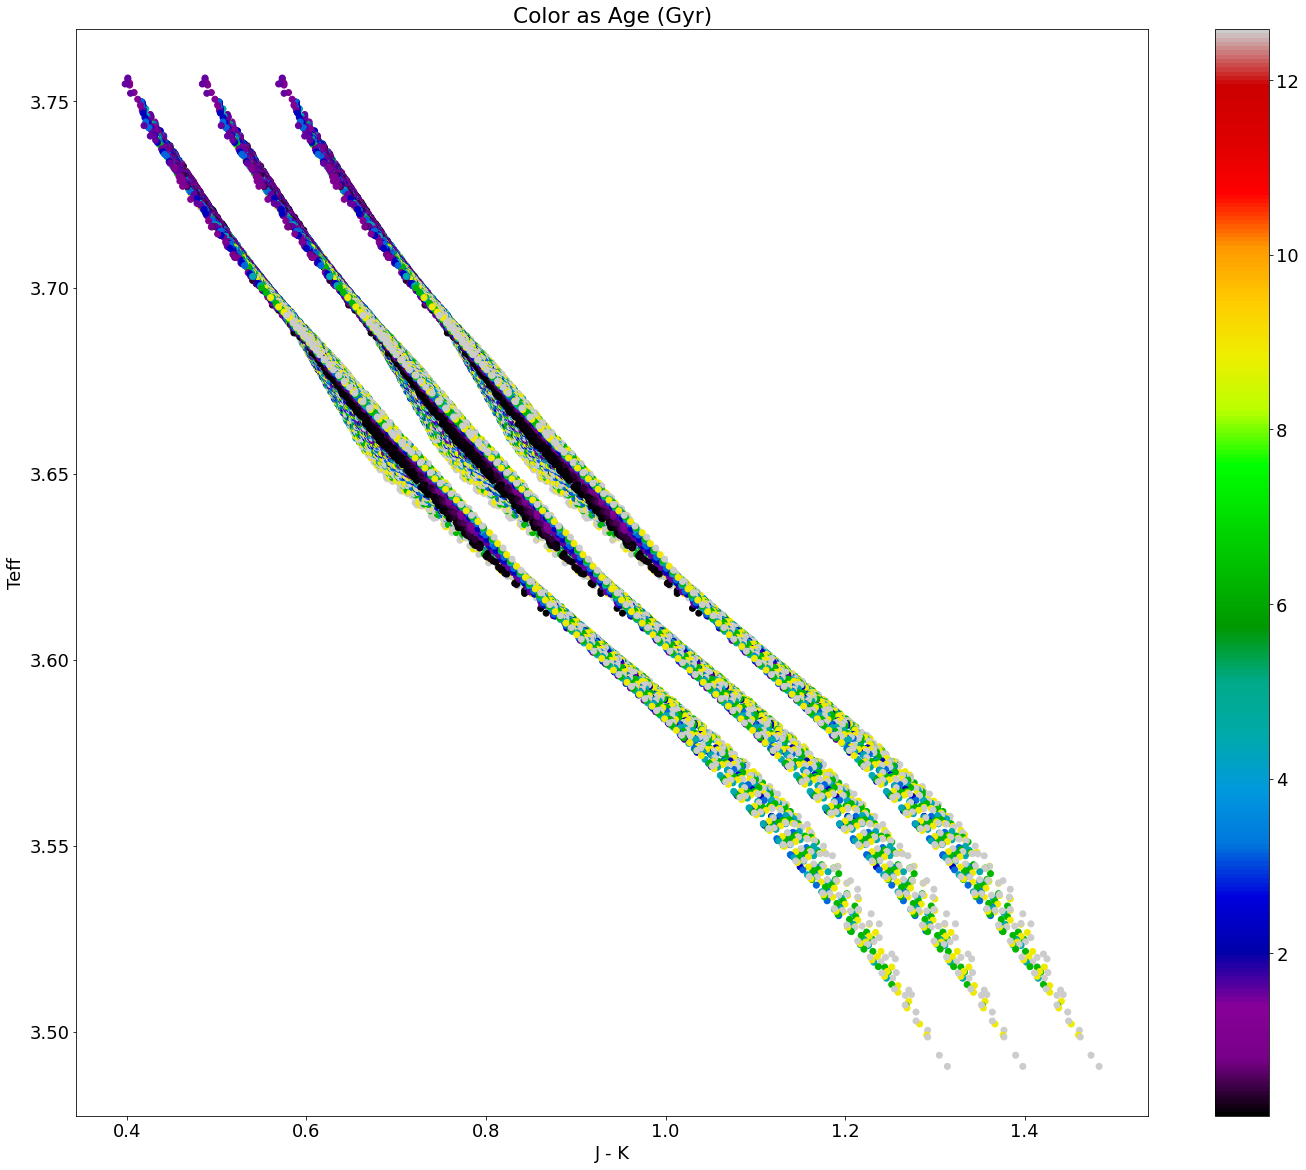

In [19]:
### A(V)
plt.figure(figsize=[12,10])
plt.scatter(av0['Jmag']-av0['Ksmag'],av0['logTe'],label='A(V) = 0.0')
plt.scatter(av05['Jmag']-av05['Ksmag'],av05['logTe'],label='A(V) = 0.5')
plt.scatter(av1['Jmag']-av1['Ksmag'],av1['logTe'],label='A(V) = 1.0')

plt.legend()

plt.xlabel(r'J - K')
plt.ylabel(r'Teff')
plt.show()

### [Fe/H]
plt.figure(figsize=[24,20])
plt.scatter(av0['Jmag']-av0['Ksmag'],av0['logTe'],c=np.log10(av0['Z']/0.02),cmap='nipy_spectral')
plt.scatter(av05['Jmag']-av05['Ksmag'],av05['logTe'],c=np.log10(av05['Z']/0.02),cmap='nipy_spectral')
plt.scatter(av1['Jmag']-av1['Ksmag'],av1['logTe'],c=np.log10(av1['Z']/0.02),cmap='nipy_spectral')

plt.colorbar()

plt.title(r'Color as [Fe/H]')
plt.xlabel(r'J - K')
plt.ylabel(r'Teff')
plt.show()

### Age
plt.figure(figsize=[24,20])
plt.scatter(av0['Jmag']-av0['Ksmag'],av0['logTe'],c=10**av0['logAge']/10**9,cmap='nipy_spectral')
plt.scatter(av05['Jmag']-av05['Ksmag'],av05['logTe'],c=10**av05['logAge']/10**9,cmap='nipy_spectral')
plt.scatter(av1['Jmag']-av1['Ksmag'],av1['logTe'],c=10**av1['logAge']/10**9,cmap='nipy_spectral')

plt.colorbar()

plt.title(r'Color as Age (Gyr)')
plt.xlabel(r'J - K')
plt.ylabel(r'Teff')
plt.show()

In [20]:
np.unique(av0['logTe']==av1['logTe'])

array([ True])

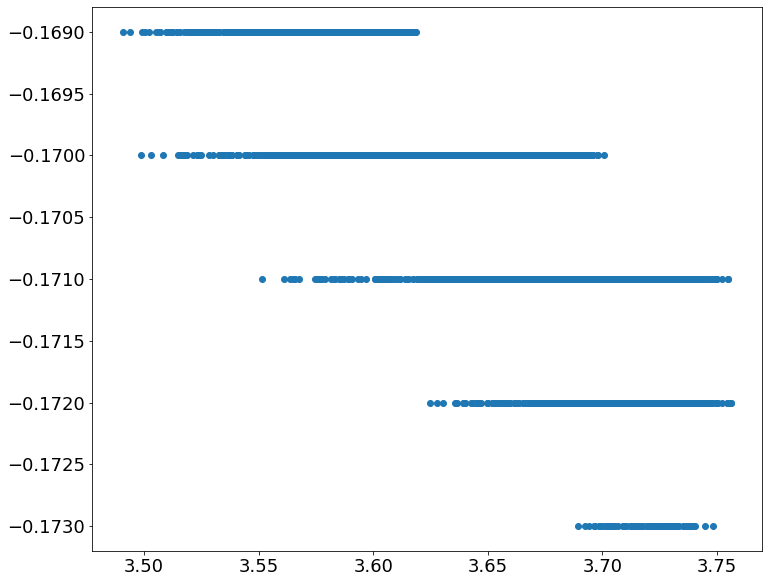

In [21]:
plt.figure(figsize=[12,10])
plt.scatter(av0['logTe'],av0['Jmag']-av0['Ksmag']-av1['Jmag']+av1['Ksmag'])

In [22]:
# plt.figure(figsize=[12,10])
# plt.scatter(av0['Jmag']-av0['Hmag'],av0['Hmag']-av0['Ksmag'])
# plt.scatter(av05['Jmag']-av05['Hmag'],av05['Hmag']-av05['Ksmag'])
# plt.scatter(av1['Jmag']-av1['Hmag'],av1['Hmag']-av1['Ksmag'])

# plt.xlabel(r'J - H')
# plt.ylabel(r'H - K')
# plt.show()

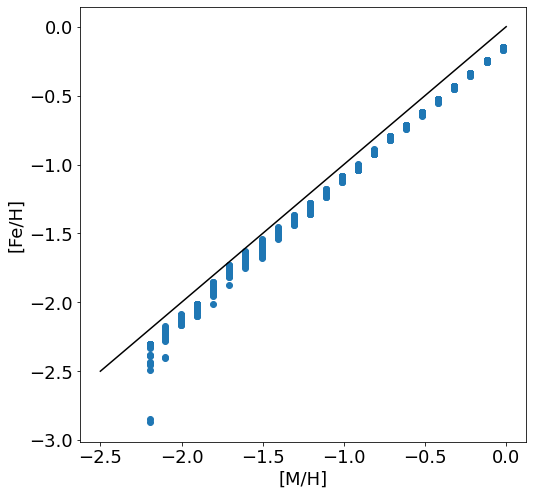

In [23]:
### [Fe/H]
plt.figure(figsize=[8,8])
plt.scatter(av0['MH'],np.log10(av0['Z']/0.02))
plt.plot([-2.5,0],[-2.5,0],c='k')

plt.xlabel(r'[M/H]')
plt.ylabel(r'[Fe/H]')
plt.show()

In [24]:
print(min(av0['MH']))
print(max(av0['MH']))

print(min(np.log10(av0['Z']/0.02)))
print(max(np.log10(av0['Z']/0.02)))

-2.1917400000000002
-0.022
-2.868702203402377
-0.14904760020650717


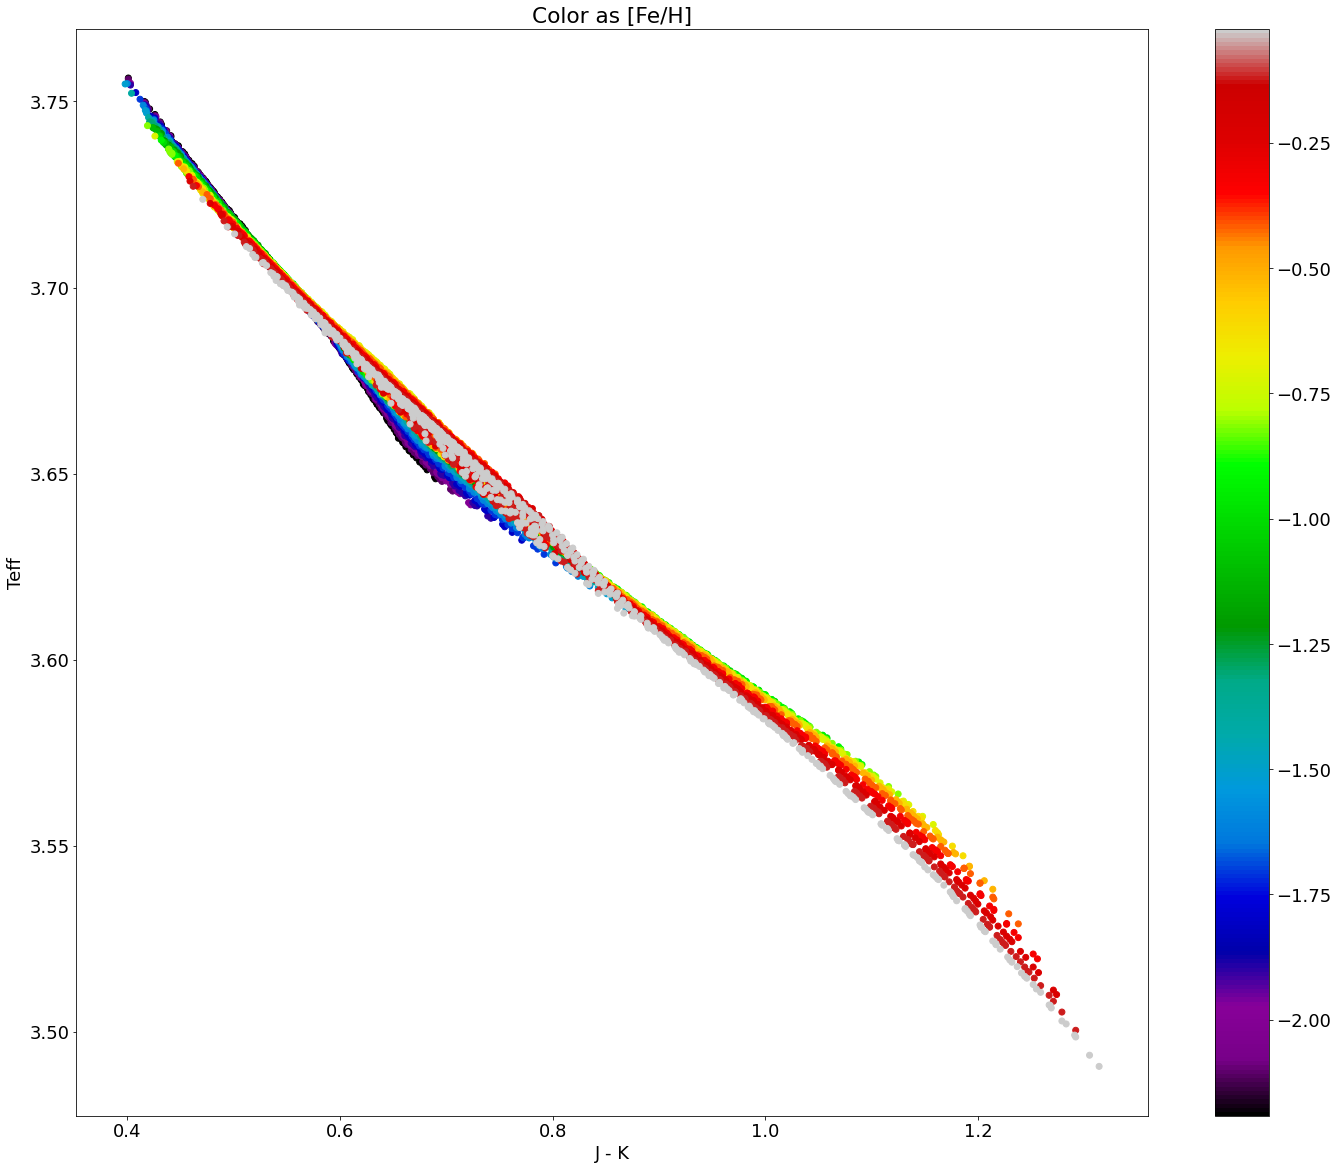

In [25]:
### [Fe/H]
plt.figure(figsize=[24,20])
plt.scatter(av0['Jmag']-av0['Ksmag'],av0['logTe'],c=av0['MH'],cmap='nipy_spectral')
plt.colorbar()

plt.title(r'Color as [Fe/H]')
plt.xlabel(r'J - K')
plt.ylabel(r'Teff')
plt.show()


In [26]:
### Find all models

col = av0['Jmag'] - av0['Ksmag']

# linear terms
tef = av0['logTe']
feh = np.log10(av0['Z']/0.02)
# lgg = av0['logg']

# linear int
teffeh = np.multiply(tef,feh)
# teflgg = np.multiply(tef,lgg)
# fehlgg = np.multiply(feh,lgg)

# squares
tefsq = tef**2
fehsq = feh**2
# lggsq = lgg**2

# cubes
tefcu = tef**3
fehcu = feh**3
# lggcu = lgg**3

# # quartics
# tefqu = tef**4
# fehqu = feh**4
# lggqu = lgg**4

#find all possible models
models = []
models_str = []

all_var_str = ['tef','feh','teffeh','tefsq','fehsq','tefcu','fehcu']
all_var = [tef,feh,teffeh,tefsq,fehsq,tefcu,fehcu]

for i in range(1,len(all_var)+1):
    for subset in it.combinations(all_var,i):
        models.append(subset)
    for subset_str in it.combinations(all_var_str,i):
        models_str.append(np.array(subset_str))
        
models = np.array(models)
models_str = np.array(models_str)

### Fit All Models

import statsmodels.api as sm 

all_params = []
summaries = []
max_resid = []
mads = []
resids = []
predict = []
ll = []
for i in tqdm_notebook(range(len(models)),desc='Done?'):
    pmodl = np.array(models[i]).T
    pmodl = sm.add_constant(pmodl)
    model = sm.OLS(col,pmodl).fit()
    summaries.append(model.summary())
    predictions = model.predict(pmodl)
    predict.append(predictions)
    residual = predictions - col
    resids.append(residual)
    all_params.append(np.asarray(model.params))
    max_resid.append(np.max(np.absolute(residual)))
    mads.append(afunc.mad(residual))
    ll.append(model.llf)

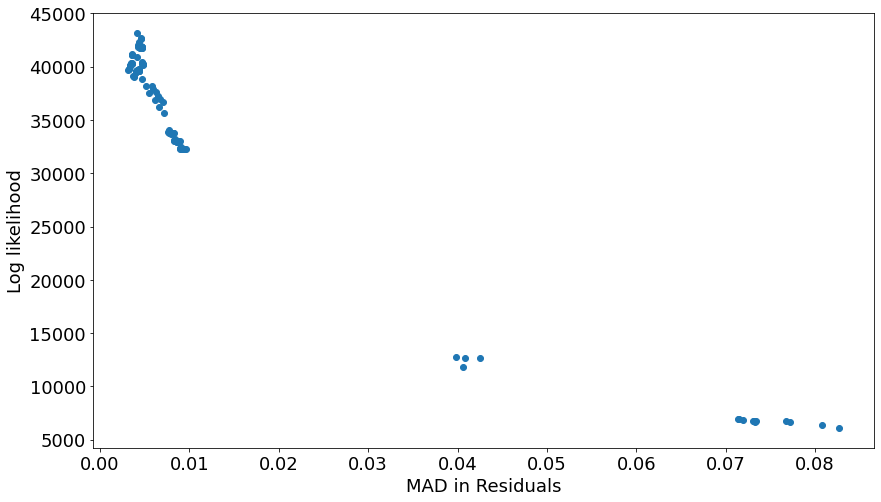

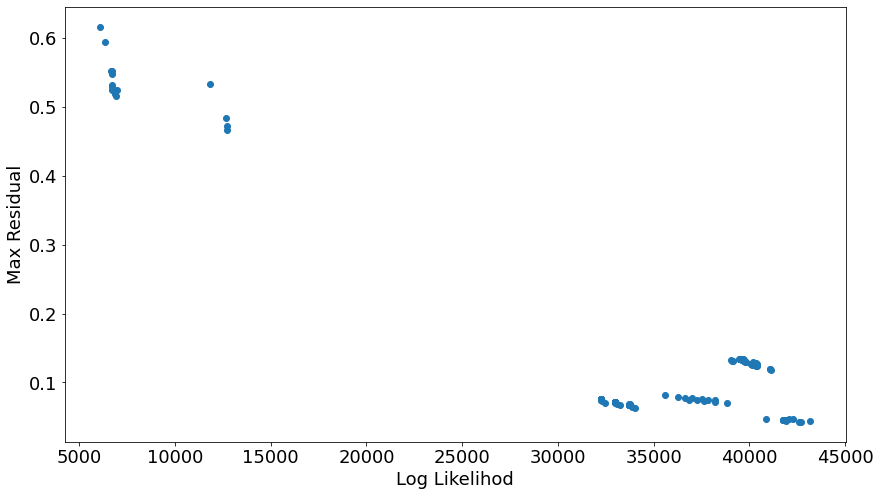

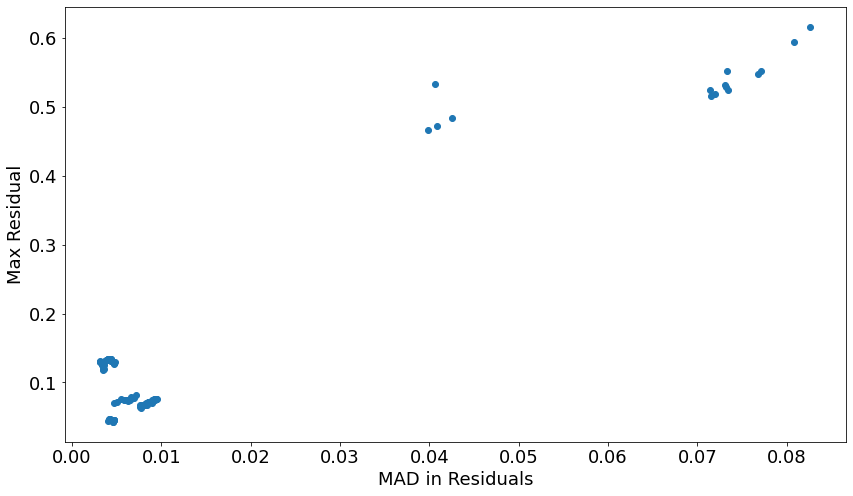

In [27]:
plt.figure(figsize=[14,8])
plt.scatter(mads,ll)
plt.xlabel(r'MAD in Residuals')
plt.ylabel(r'Log likelihood')
plt.show()

plt.figure(figsize=[14,8])
plt.scatter(ll,max_resid)
plt.xlabel(r'Log Likelihod')
plt.ylabel(r'Max Residual')
plt.show()

plt.figure(figsize=[14,8])
plt.scatter(mads,max_resid)
plt.xlabel(r'MAD in Residuals')
plt.ylabel(r'Max Residual')
plt.show()

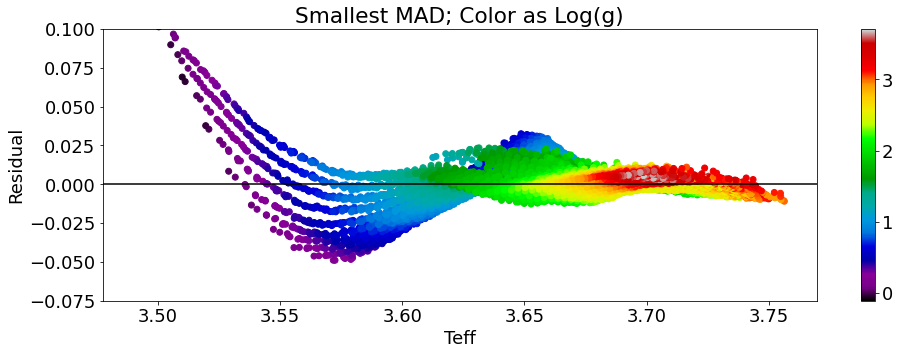

MAX:  0.1309251576150805


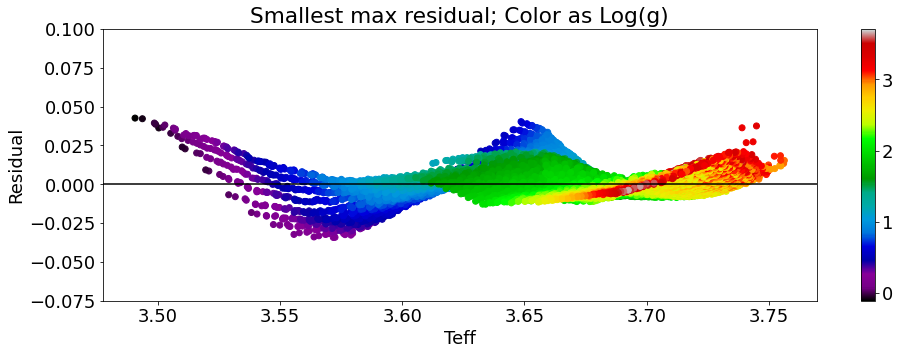

MAX:  0.04264278811397815


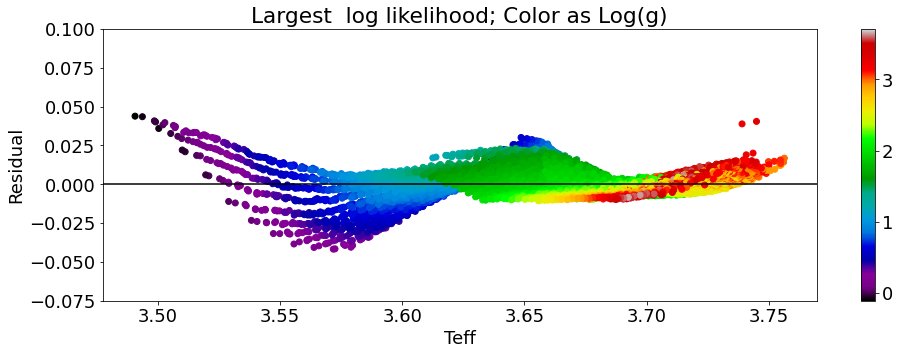

MAX:  0.0438842443496783


In [28]:
plt.figure(figsize=[16,5])
plt.scatter(av0['logTe'],resids[np.asarray(mads).argmin()],c=av0['logg'],cmap='nipy_spectral')
plt.axhline(0.,c='k')
plt.colorbar()
plt.ylim(-0.075,0.1)
plt.title(r'Smallest MAD; Color as Log(g)')
plt.xlabel(r'Teff')
plt.ylabel(r'Residual')
plt.show()
print('MAX: ',max(np.abs(resids[np.asarray(mads).argmin()])))

plt.figure(figsize=[16,5])
plt.scatter(av0['logTe'],resids[np.asarray(max_resid).argmin()],c=av0['logg'],cmap='nipy_spectral')
plt.axhline(0.,c='k')
plt.colorbar()
plt.ylim(-0.075,0.1)
plt.title(r'Smallest max residual; Color as Log(g)')
plt.xlabel(r'Teff')
plt.ylabel(r'Residual')
plt.show()
print('MAX: ',max(np.abs(resids[np.asarray(max_resid).argmin()])))

plt.figure(figsize=[16,5])
plt.scatter(av0['logTe'],resids[np.asarray(ll).argmax()],c=av0['logg'],cmap='nipy_spectral')
plt.axhline(0.,c='k')
plt.colorbar()
plt.ylim(-0.075,0.1)
plt.title(r'Largest  log likelihood; Color as Log(g)')
plt.xlabel(r'Teff')
plt.ylabel(r'Residual')
plt.show()
print('MAX: ',max(np.abs(resids[np.asarray(ll).argmax()])))

In [29]:
### Find all models

col = av0['Jmag'] - av0['Ksmag']

# linear terms
tef = av0['logTe']
feh = np.log10(av0['Z']/0.02)
lgg = av0['logg']

# linear int
teffeh = np.multiply(tef,feh)
teflgg = np.multiply(tef,lgg)
fehlgg = np.multiply(feh,lgg)

# squares
tefsq = tef**2
fehsq = feh**2
lggsq = lgg**2

# cubes
tefcu = tef**3
fehcu = feh**3
lggcu = lgg**3

# # quartics
# tefqu = tef**4
# fehqu = feh**4
# lggqu = lgg**4

#find all possible models
models = []
models_str = []

all_var_str = ['tef','feh','lgg','teffeh','teflgg','fehlgg','tefsq','fehsq','lggsq','tefcu','fehcu','lggcu']#,
#                'tefqu','fehqu','lggqu']
all_var = [tef,feh,lgg,teffeh,teflgg,fehlgg,tefsq,fehsq,lggsq,tefcu,fehcu,lggcu]#,tefqu,fehqu,lggqu]

for i in range(1,len(all_var)+1):
    for subset in it.combinations(all_var,i):
        models.append(subset)
    for subset_str in it.combinations(all_var_str,i):
        models_str.append(np.array(subset_str))
        
models = np.array(models)
models_str = np.array(models_str)

### Fit All Models

import statsmodels.api as sm 

all_params = []
summaries = []
max_resid = []
mads = []
resids = []
predict = []
ll = []
for i in tqdm_notebook(range(len(models)),desc='Done?'):
    pmodl = np.array(models[i]).T
    pmodl = sm.add_constant(pmodl)
    model = sm.OLS(col,pmodl).fit()
    summaries.append(model.summary())
    predictions = model.predict(pmodl)
    predict.append(predictions)
    residual = predictions - col
    resids.append(residual)
    all_params.append(np.asarray(model.params))
    max_resid.append(np.max(np.absolute(residual)))
    mads.append(afunc.mad(residual))
    ll.append(model.llf)

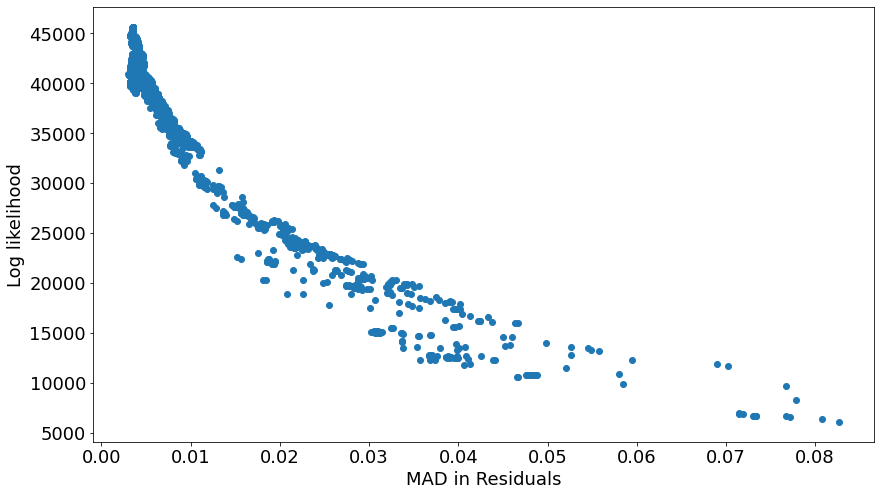

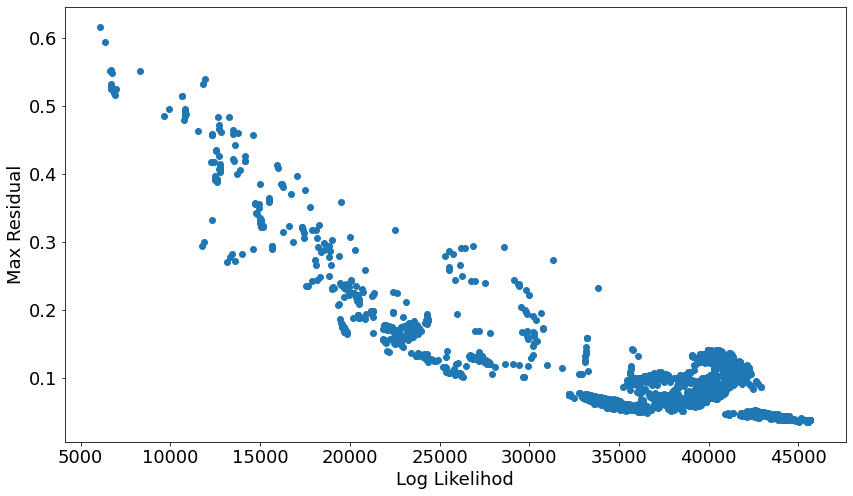

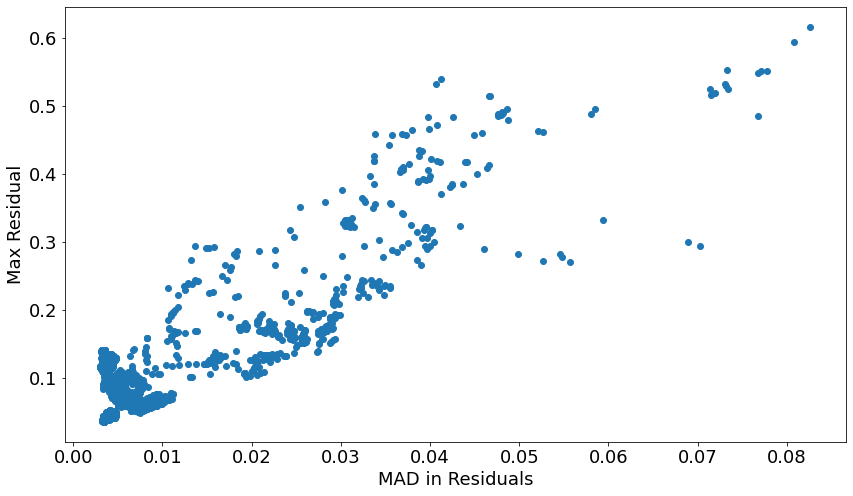

In [30]:
plt.figure(figsize=[14,8])
plt.scatter(mads,ll)
plt.xlabel(r'MAD in Residuals')
plt.ylabel(r'Log likelihood')
plt.show()

plt.figure(figsize=[14,8])
plt.scatter(ll,max_resid)
plt.xlabel(r'Log Likelihod')
plt.ylabel(r'Max Residual')
plt.show()

plt.figure(figsize=[14,8])
plt.scatter(mads,max_resid)
plt.xlabel(r'MAD in Residuals')
plt.ylabel(r'Max Residual')
plt.show()

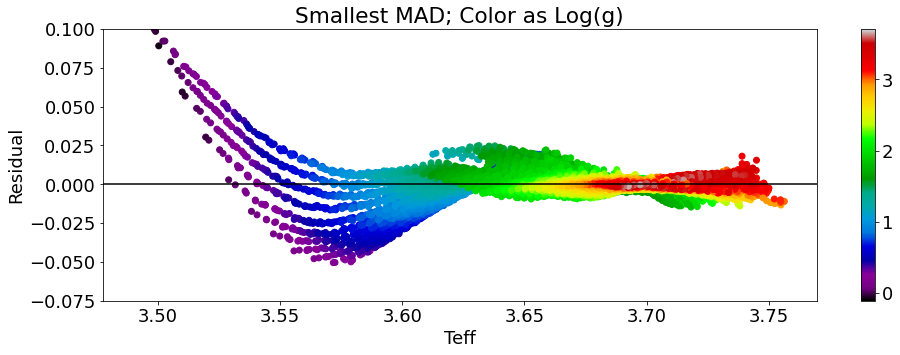

MAX:  0.11565538444914392


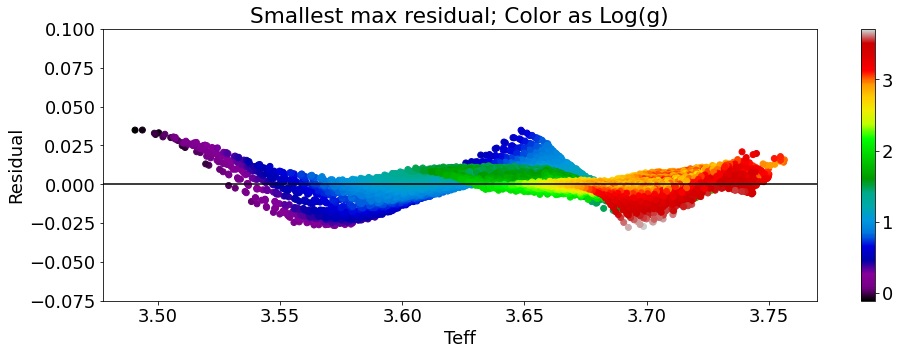

MAX:  0.034957325151463214


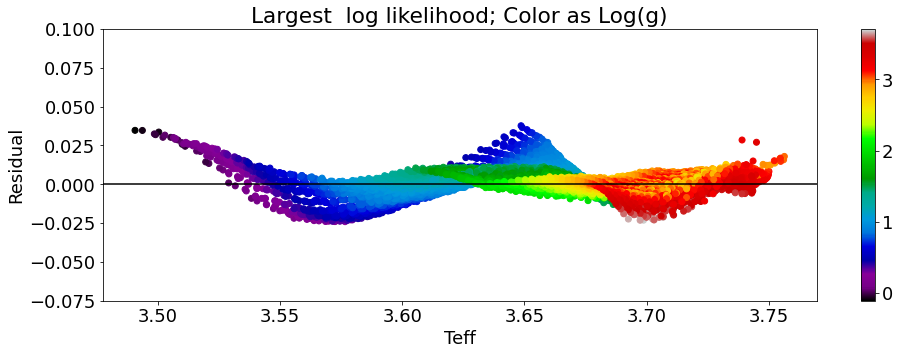

MAX:  0.037719687144429415


In [31]:
plt.figure(figsize=[16,5])
plt.scatter(av0['logTe'],resids[np.asarray(mads).argmin()],c=av0['logg'],cmap='nipy_spectral')
plt.axhline(0.,c='k')
plt.colorbar()
plt.ylim(-0.075,0.1)
plt.title(r'Smallest MAD; Color as Log(g)')
plt.xlabel(r'Teff')
plt.ylabel(r'Residual')
plt.show()
print('MAX: ',max(np.abs(resids[np.asarray(mads).argmin()])))

plt.figure(figsize=[16,5])
plt.scatter(av0['logTe'],resids[np.asarray(max_resid).argmin()],c=av0['logg'],cmap='nipy_spectral')
plt.axhline(0.,c='k')
plt.colorbar()
plt.ylim(-0.075,0.1)
plt.title(r'Smallest max residual; Color as Log(g)')
plt.xlabel(r'Teff')
plt.ylabel(r'Residual')
plt.show()
print('MAX: ',max(np.abs(resids[np.asarray(max_resid).argmin()])))

plt.figure(figsize=[16,5])
plt.scatter(av0['logTe'],resids[np.asarray(ll).argmax()],c=av0['logg'],cmap='nipy_spectral')
plt.axhline(0.,c='k')
plt.colorbar()
plt.ylim(-0.075,0.1)
plt.title(r'Largest  log likelihood; Color as Log(g)')
plt.xlabel(r'Teff')
plt.ylabel(r'Residual')
plt.show()
print('MAX: ',max(np.abs(resids[np.asarray(ll).argmax()])))

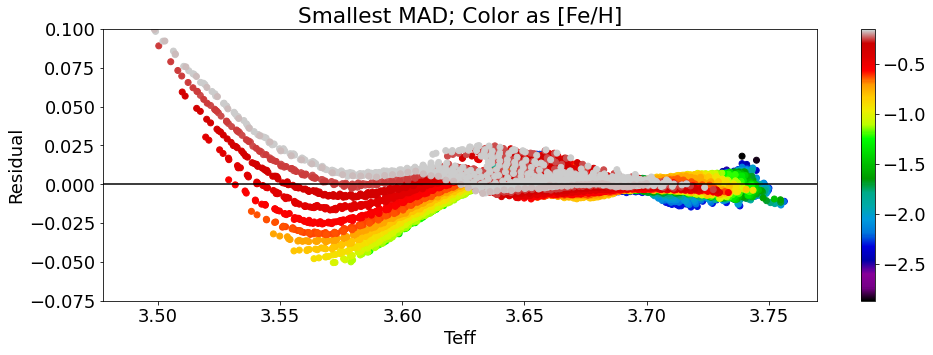

MAX:  0.11565538444914392


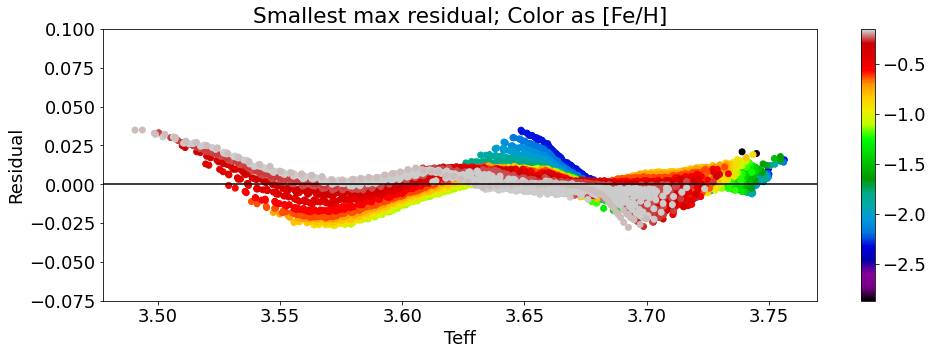

MAX:  0.034957325151463214


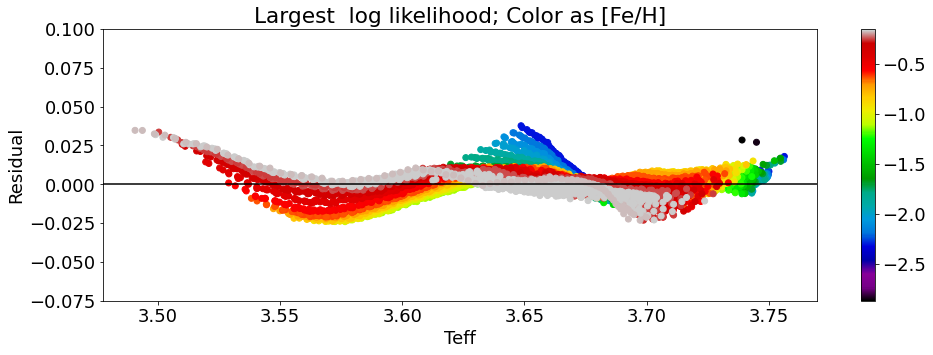

MAX:  0.037719687144429415


In [32]:
plt.figure(figsize=[16,5])
plt.scatter(av0['logTe'],resids[np.asarray(mads).argmin()],c=np.log10(av0['Z']/0.02),cmap='nipy_spectral')
plt.axhline(0.,c='k')
plt.colorbar()
plt.ylim(-0.075,0.1)
plt.title(r'Smallest MAD; Color as [Fe/H]')
plt.xlabel(r'Teff')
plt.ylabel(r'Residual')
plt.show()
print('MAX: ',max(np.abs(resids[np.asarray(mads).argmin()])))

plt.figure(figsize=[16,5])
plt.scatter(av0['logTe'],resids[np.asarray(max_resid).argmin()],c=np.log10(av0['Z']/0.02),cmap='nipy_spectral')
plt.axhline(0.,c='k')
plt.colorbar()
plt.ylim(-0.075,0.1)
plt.title(r'Smallest max residual; Color as [Fe/H]')
plt.xlabel(r'Teff')
plt.ylabel(r'Residual')
plt.show()
print('MAX: ',max(np.abs(resids[np.asarray(max_resid).argmin()])))

plt.figure(figsize=[16,5])
plt.scatter(av0['logTe'],resids[np.asarray(ll).argmax()],c=np.log10(av0['Z']/0.02),cmap='nipy_spectral')
plt.axhline(0.,c='k')
plt.colorbar()
plt.ylim(-0.075,0.1)
plt.title(r'Largest  log likelihood; Color as [Fe/H]')
plt.xlabel(r'Teff')
plt.ylabel(r'Residual')
plt.show()
print('MAX: ',max(np.abs(resids[np.asarray(ll).argmax()])))

In [33]:
print(r'### Smallest MAD ###')
print(summaries[np.asarray(mads).argmin()])
print('Smallest MAD: ',models_str[np.asarray(mads).argmin()])
print(all_params[np.asarray(mads).argmin()])

### Smallest MAD ###
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 7.465e+05
Date:                Tue, 13 Apr 2021   Prob (F-statistic):               0.00
Time:                        11:34:16   Log-Likelihood:                 40892.
No. Observations:               12647   AIC:                        -8.177e+04
Df Residuals:                   12641   BIC:                        -8.173e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         24.1902      0.20

In [34]:
print(r'### Smallest max residual ###')
print(summaries[np.asarray(max_resid).argmin()])
print('Smallest max residual: ',models_str[np.asarray(max_resid).argmin()])
print(all_params[np.asarray(max_resid).argmin()])

### Smallest max residual ###
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 8.591e+05
Date:                Tue, 13 Apr 2021   Prob (F-statistic):               0.00
Time:                        11:34:36   Log-Likelihood:                 45489.
No. Observations:               12647   AIC:                        -9.096e+04
Df Residuals:                   12637   BIC:                        -9.088e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2256.7976 

In [35]:
print(r'### Largest log likelihood ###')
print(summaries[np.asarray(ll).argmax()])
print('Largest log likelihood: ',models_str[np.asarray(ll).argmax()])
print(all_params[np.asarray(ll).argmax()])

### Largest log likelihood ###
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 6.626e+05
Date:                Tue, 13 Apr 2021   Prob (F-statistic):               0.00
Time:                        11:34:37   Log-Likelihood:                 45667.
No. Observations:               12647   AIC:                        -9.131e+04
Df Residuals:                   12634   BIC:                        -9.121e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2320.2724

In [36]:
def min_mad(x,y,z):
    #tef, feh, lgg
    #['feh' 'lgg' 'fehlgg' 'tefsq' 'tefcu']
    p = [2.41901766e+01,2.32903807e-02,-3.27123184e-03,-1.19720783e-02,-4.22651246e+00,6.75764692e-01]
    out = (p[0]+
           p[1]*y+p[2]*z+
           p[3]*np.multiply(y,z)+
           p[4]*x**2+
           p[5]*np.power(x,3))
    return out
    
def max_res(x,y,z):
    #tef, feh, lgg
    #['tef' 'teffeh' 'fehlgg' 'tefsq' 'fehsq' 'lggsq' 'tefcu' 'fehcu' 'lggcu']
    p = [-2.25679763e+03,1.88820289e+03,-2.45789267e-02,6.74088690e-03,-5.25066705e+02,-5.72535730e-02,
         2.93914827e-02,4.85472362e+01,-1.32392756e-02,-6.77050951e-03]
    out = (p[0]+
           p[1]*x+
           p[2]*np.multiply(x,y)+p[3]*np.multiply(y,z)+
           p[4]*x**2+p[5]*y**2+p[6]*z**2+
           p[7]*np.power(x,3)+p[8]*np.power(y,3)+p[9]*np.power(z,3))
    return out
    
def max_ll(x,y,z):
    #tef, feh, lgg
    #['tef' 'feh' 'lgg' 'teffeh' 'teflgg' 'fehlgg' 'tefsq' 'fehsq' 'lggsq' 'tefcu' 'fehcu' 'lggcu']
    p = [-2.32027240e+03,1.94608532e+03,4.61738828e-02,1.24503763e+00,-3.58117664e-02,-3.61445170e-01,
         7.76347802e-04,-5.42655434e+02,-6.43718746e-02,5.48654571e-02,5.03279728e+01,-1.47437693e-02,
         -8.90422825e-03]
    out = (p[0]+
           p[1]*x+p[2]*y+p[3]*z+
           p[4]*np.multiply(x,y)+p[5]*np.multiply(x,z)+p[6]*np.multiply(y,z)+
           p[7]*x**2+p[8]*y**2+p[9]*z**2+
           p[10]*np.power(x,3)+p[11]*np.power(y,3)+p[12]*np.power(z,3))
    return out

<font size='45'>
    <b>
        Real Stars
    </b>
</font>

In [37]:
###################
### Import DR17 ###
###################

dr17 = fits.getdata('/Users/joshuapovick/Desktop/Research/fits/allStarLite-dr17-synspec.fits',0)

lmc16 = fits.getdata('/Users/joshuapovick/Desktop/Research/fits/lmc_rgbmembers.r13-l33-58672.fits.gz')
cln = np.where(lmc16['FE_H']>-9999.0)
lmc16 = lmc16[cln]

# min_mad

In [38]:
jk_int_min_mad = []
for i in tqdm_notebook(range(len(lmc16))):
    jk_int_min_mad.append(min_mad(np.log10(lmc16['TEFF'][i]),lmc16['FE_H'][i],lmc16['LOGG'][i]))
    
jk_int_min_mad = np.asarray(jk_int_min_mad)

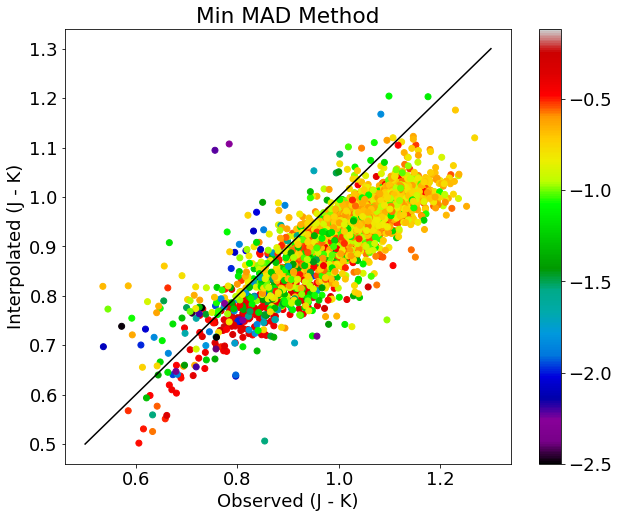

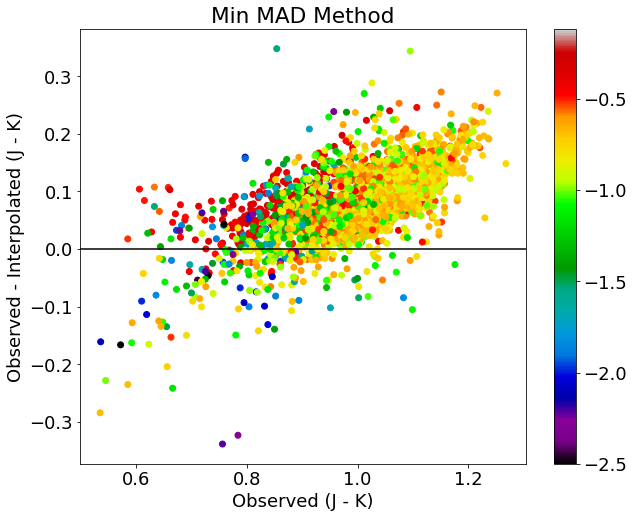

In [39]:
plt.figure(figsize=[10,8])
plt.scatter(lmc16['J']-lmc16['K'],jk_int_min_mad,c=lmc16['FE_H'],cmap='nipy_spectral')
plt.colorbar()
plt.plot([0.5,1.3],[0.5,1.3],c='k')
plt.title(r'''Min MAD Method''')
plt.xlabel(r'Observed (J - K)')
plt.ylabel(r'Interpolated (J - K)')
plt.show()

plt.figure(figsize=[10,8])
plt.scatter(lmc16['J']-lmc16['K'],lmc16['J']-lmc16['K']-jk_int_min_mad,c=lmc16['FE_H'],cmap='nipy_spectral')
plt.colorbar()
plt.axhline(0.0,c='k')
plt.title(r'''Min MAD Method''')
plt.xlabel(r'Observed (J - K)')
plt.ylabel(r'Observed - Interpolated (J - K)')
plt.show()

# max_res

In [40]:
jk_int_max_res = []
for i in tqdm_notebook(range(len(lmc16))):
    jk_int_max_res.append(max_res(np.log10(lmc16['TEFF'][i]),lmc16['FE_H'][i],lmc16['LOGG'][i]))
    
jk_int_max_res = np.asarray(jk_int_max_res)

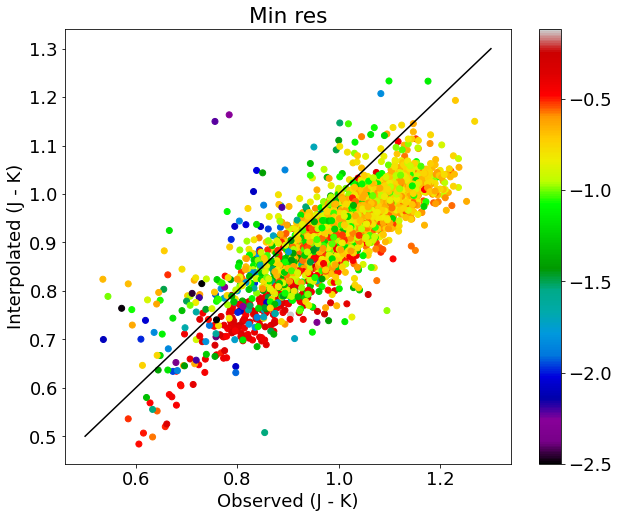

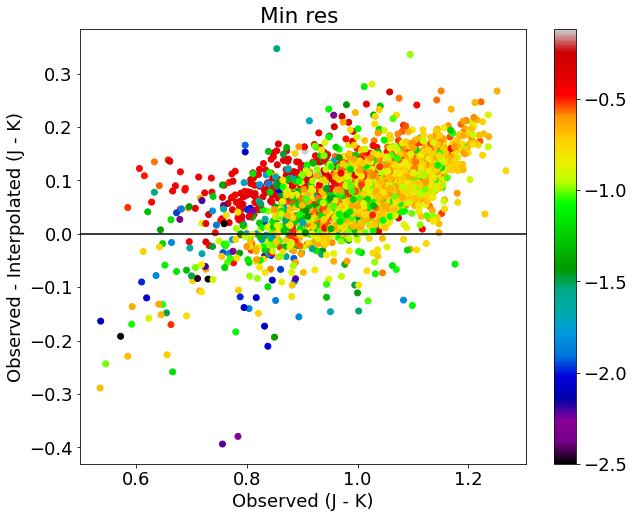

In [41]:
plt.figure(figsize=[10,8])
plt.scatter(lmc16['J']-lmc16['K'],jk_int_max_res,c=lmc16['FE_H'],cmap='nipy_spectral')
plt.colorbar()
plt.plot([0.5,1.3],[0.5,1.3],c='k')
plt.title(r'''Min res''')
plt.xlabel(r'Observed (J - K)')
plt.ylabel(r'Interpolated (J - K)')
plt.show()

plt.figure(figsize=[10,8])
plt.scatter(lmc16['J']-lmc16['K'],lmc16['J']-lmc16['K']-jk_int_max_res,c=lmc16['FE_H'],cmap='nipy_spectral')
plt.colorbar()
plt.axhline(0.0,c='k')
plt.title(r'''Min res ''')
plt.xlabel(r'Observed (J - K)')
plt.ylabel(r'Observed - Interpolated (J - K)')
plt.show()

# max_ll

In [42]:
jk_int_max_ll = []
for i in tqdm_notebook(range(len(lmc16))):
    jk_int_max_ll.append(max_ll(np.log10(lmc16['TEFF'][i]),lmc16['FE_H'][i],lmc16['LOGG'][i]))
    
jk_int_max_ll = np.asarray(jk_int_max_ll)

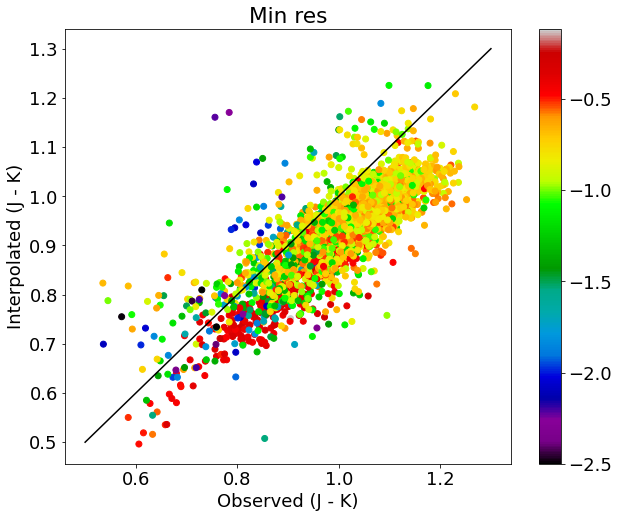

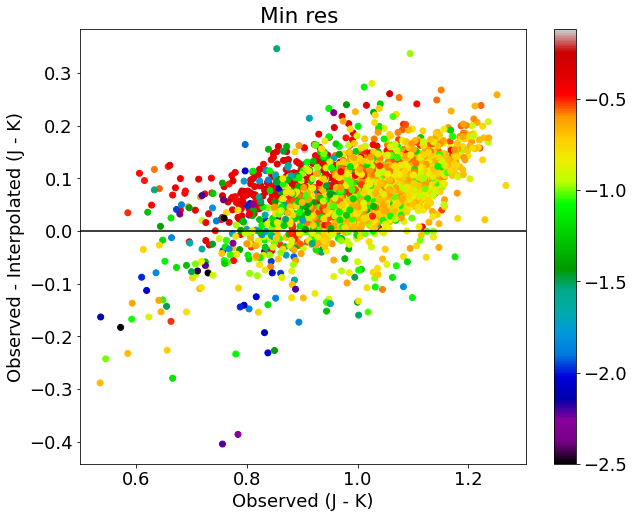

In [43]:
plt.figure(figsize=[10,8])
plt.scatter(lmc16['J']-lmc16['K'],jk_int_max_ll,c=lmc16['FE_H'],cmap='nipy_spectral')
plt.colorbar()
plt.plot([0.5,1.3],[0.5,1.3],c='k')
plt.title(r'''Min res''')
plt.xlabel(r'Observed (J - K)')
plt.ylabel(r'Interpolated (J - K)')
plt.show()

plt.figure(figsize=[10,8])
plt.scatter(lmc16['J']-lmc16['K'],lmc16['J']-lmc16['K']-jk_int_max_ll,c=lmc16['FE_H'],cmap='nipy_spectral')
plt.colorbar()
plt.axhline(0.0,c='k')
plt.title(r'''Min res ''')
plt.xlabel(r'Observed (J - K)')
plt.ylabel(r'Observed - Interpolated (J - K)')
plt.show()

# Shepard's Method

In [44]:
### Inital Interpolator setup
from photutils.utils import ShepardIDWInterpolator as idw

val_arr = np.array([av0['logTe'],np.log10(av0['Z']/0.02),av0['logg']]).T
interpol = idw(val_arr,av0['Jmag']-av0['Ksmag'])

jk_int_she = []
for i in tqdm_notebook(range(len(lmc16))):
    jk_int_she.append(interpol([np.log10(lmc16['TEFF'][i]),lmc16['FE_H'][i],lmc16['LOGG'][i]]))
    
jk_int_she = np.asarray(jk_int_she)

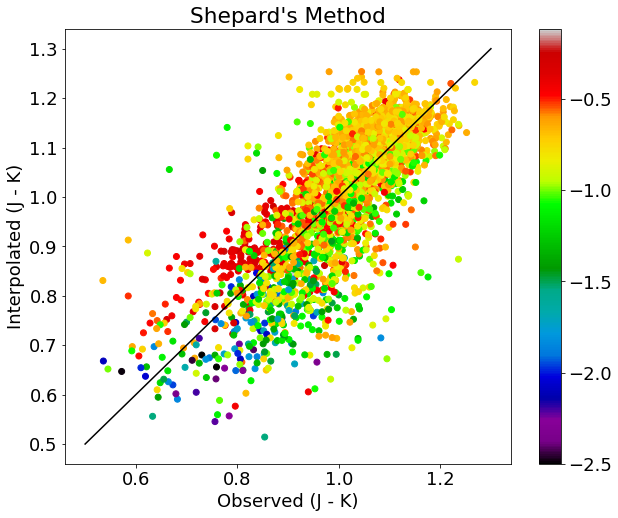

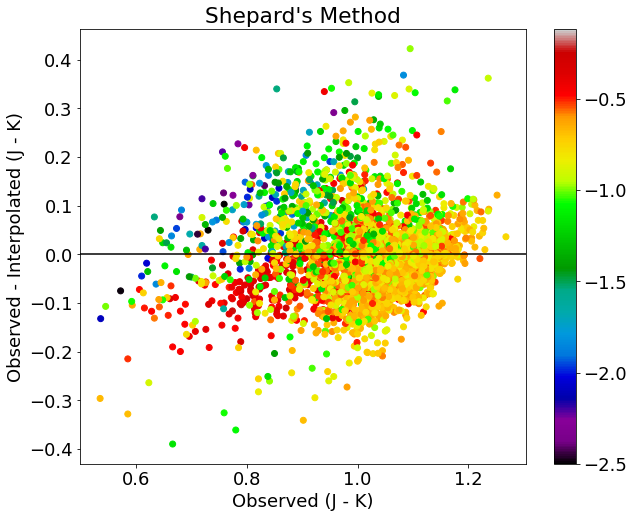

In [45]:
plt.figure(figsize=[10,8])
plt.scatter(lmc16['J']-lmc16['K'],jk_int_she,c=lmc16['FE_H'],cmap='nipy_spectral')
plt.colorbar()
plt.plot([0.5,1.3],[0.5,1.3],c='k')
plt.title(r'''Shepard's Method''')
plt.xlabel(r'Observed (J - K)')
plt.ylabel(r'Interpolated (J - K)')
plt.show()

plt.figure(figsize=[10,8])
plt.scatter(lmc16['J']-lmc16['K'],lmc16['J']-lmc16['K']-jk_int_she,c=lmc16['FE_H'],cmap='nipy_spectral')
plt.colorbar()
plt.axhline(0.0,c='k')
plt.title(r'''Shepard's Method''')
plt.xlabel(r'Observed (J - K)')
plt.ylabel(r'Observed - Interpolated (J - K)')
plt.show()

In [46]:
single = np.where((av0['logAge']==9.65)&(av0['MH']==-0.814))

sin_arr = np.array((av0['Jmag']-av0['Ksmag'])[single]).T

sin_int = idw(sin_arr,av0['logTe'][single])

rand_col = []
for i in range(100):
    rand_col.append(np.random.uniform(min((av0['Jmag']-av0['Ksmag'])[single]),
                                          max((av0['Jmag']-av0['Ksmag'])[single])))

pred_col = np.asarray(sin_int(rand_col))

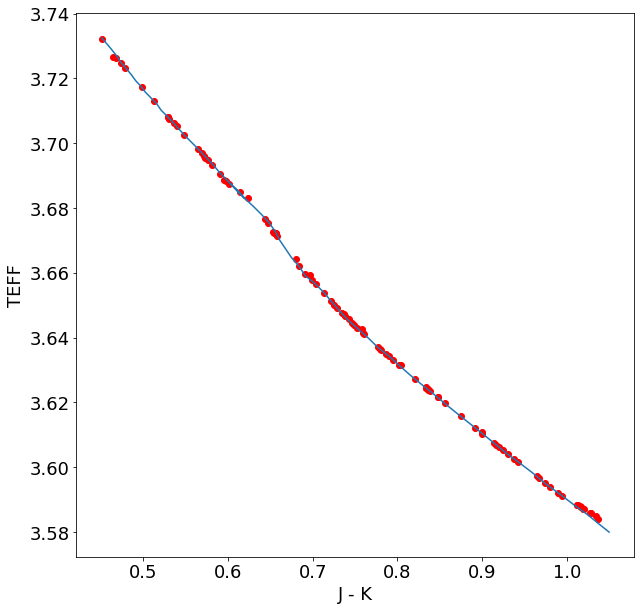

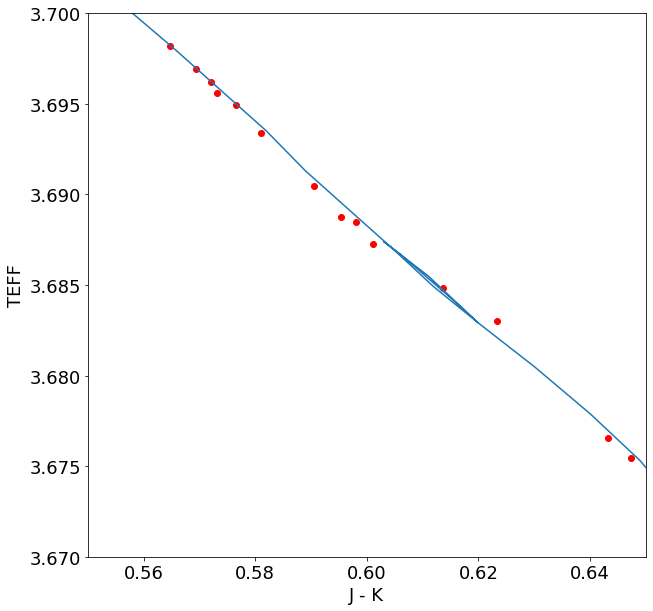

In [47]:
plt.figure(figsize=[10,10])
plt.plot((av0['Jmag']-av0['Ksmag'])[single],av0['logTe'][single],label='9.65; -0.814')
plt.scatter(rand_col,pred_col,c='r')

plt.ylabel(r'TEFF')
plt.xlabel(r'J - K')
plt.show()


plt.figure(figsize=[10,10])
plt.plot((av0['Jmag']-av0['Ksmag'])[single],av0['logTe'][single],label='9.65; -0.814')
plt.scatter(rand_col,pred_col,c='r')

plt.xlim(0.55,0.65)
plt.ylim(3.67,3.70)

plt.ylabel(r'TEFF')
plt.xlabel(r'J - K')
plt.show()

In [48]:
### Inital Interpolator setup

val_arr = np.array([av0['logTe'],av0['MH']]).T
interpol2 = idw(val_arr,av0['Jmag']-av0['Ksmag'])

jk_int_she2 = []
for i in tqdm_notebook(range(len(lmc16))):
    jk_int_she2.append(interpol2([np.log10(lmc16['TEFF'][i]),lmc16['FE_H'][i]]))
    
jk_int_she2 = np.asarray(jk_int_she2)

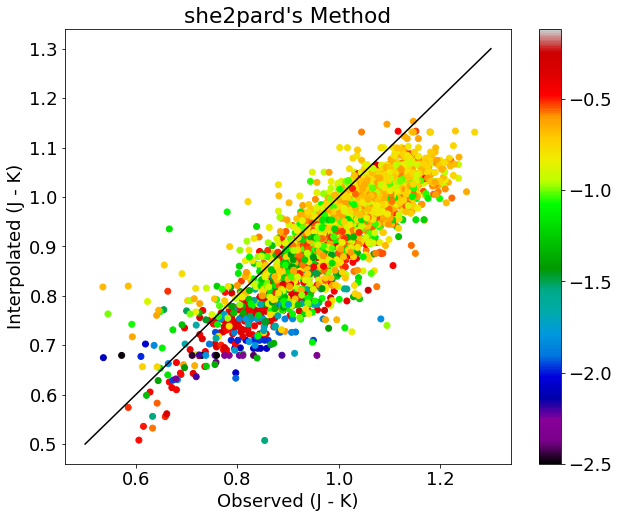

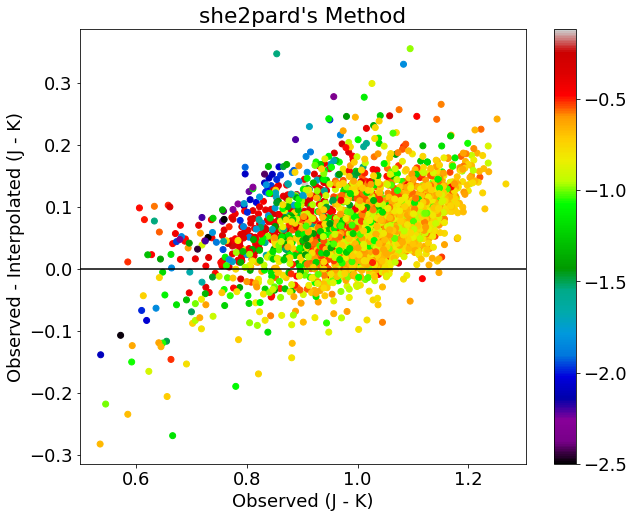

In [49]:
plt.figure(figsize=[10,8])
plt.scatter(lmc16['J']-lmc16['K'],jk_int_she2,c=lmc16['FE_H'],cmap='nipy_spectral')
plt.colorbar()
plt.plot([0.5,1.3],[0.5,1.3],c='k')
plt.title(r'''she2pard's Method''')
plt.xlabel(r'Observed (J - K)')
plt.ylabel(r'Interpolated (J - K)')
plt.show()

plt.figure(figsize=[10,8])
plt.scatter(lmc16['J']-lmc16['K'],lmc16['J']-lmc16['K']-jk_int_she2,c=lmc16['FE_H'],cmap='nipy_spectral')
plt.colorbar()
plt.axhline(0.0,c='k')
plt.title(r'''she2pard's Method''')
plt.xlabel(r'Observed (J - K)')
plt.ylabel(r'Observed - Interpolated (J - K)')
plt.show()

# interp2d

In [50]:
from scipy.interpolate import interp2d
spl2d = interp2d(av0['logTe'],av0['MH'],av0['Jmag']-av0['Ksmag'],kind='cubic')

jk_int_spl2d = []
for i in tqdm_notebook(range(len(lmc16))):
    jk_int_spl2d.append(spl2d(np.log10(lmc16['TEFF'][i]),lmc16['FE_H'][i]))
    
jk_int_spl2d = np.asarray(jk_int_spl2d)

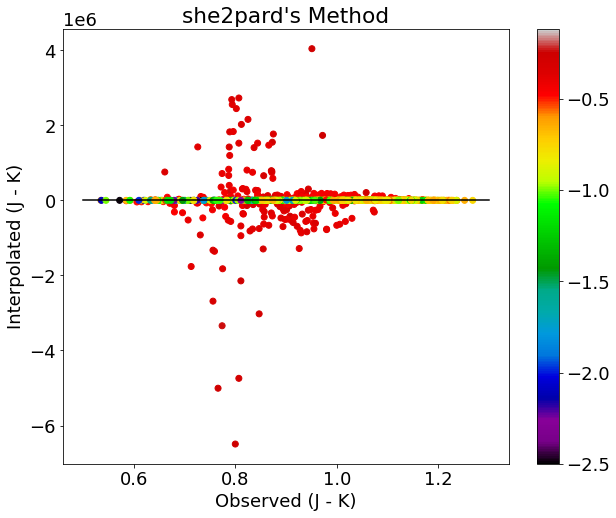

In [51]:
len

plt.figure(figsize=[10,8])
plt.scatter(lmc16['J']-lmc16['K'],jk_int_spl2d,c=lmc16['FE_H'],cmap='nipy_spectral')
plt.colorbar()
plt.plot([0.5,1.3],[0.5,1.3],c='k')
plt.title(r'''she2pard's Method''')
plt.xlabel(r'Observed (J - K)')
plt.ylabel(r'Interpolated (J - K)')
plt.show()

# Nearest Neighbor Interpolation

In [52]:
## Inital Interpolator setup
from scipy.interpolate import NearestNDInterpolator
# from scipy.interpolate import LinearNDInterpolator

# import time

# t = time.process_time()
# print('elapsed_time:', time.process_time() - t)

interpolnear = NearestNDInterpolator(val_arr,av0['Jmag']-av0['Ksmag'])

jk_int_near = []
for i in tqdm_notebook(range(len(lmc16))):
    jk_int_near.append(interpolnear([np.log10(lmc16['TEFF'][i]),lmc16['FE_H'][i],lmc16['LOGG'][i]]))
    
jk_int_near = np.concatenate(jk_int_near,axis=0)

ValueError: cannot reshape array of size 3 into shape (2)

ValueError: x and y must be the same size

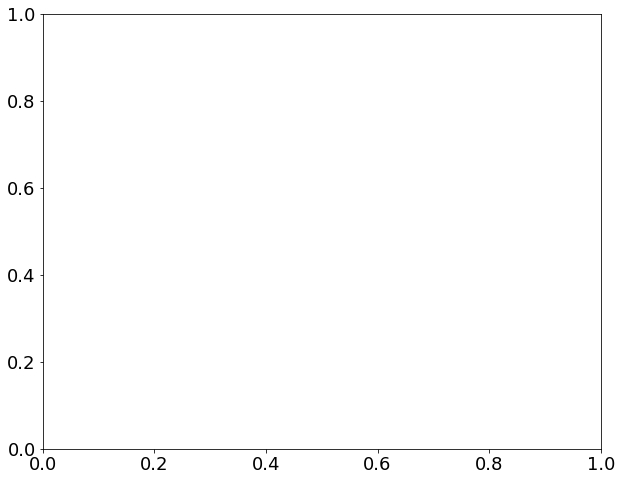

In [53]:
plt.figure(figsize=[10,8])
plt.scatter(lmc16['J']-lmc16['K'],jk_int_near,c=lmc16['FE_H'],cmap='nipy_spectral')
plt.colorbar()
plt.plot([0.5,1.3],[0.5,1.3],c='k')
plt.title(r'''Nearest Neighbor''')
plt.xlabel(r'Observed (J - K)')
plt.ylabel(r'Interpolated (J - K)')
plt.show()

plt.figure(figsize=[10,8])
plt.scatter(lmc16['J']-lmc16['K'],lmc16['J']-lmc16['K']-jk_int_near,c=lmc16['FE_H'],cmap='nipy_spectral')
plt.colorbar()
plt.axhline(0.0,c='k')
plt.title(r'''Nearest Neighbor''')
plt.xlabel(r'Observed (J - K)')
plt.ylabel(r'Observed - Interpolated (J - K)')
plt.show()

# Linear Interpolation

In [54]:
from scipy.interpolate import LinearNDInterpolator

# import time

# t = time.process_time()
# print('elapsed_time:', time.process_time() - t)

interpolnear = LinearNDInterpolator(val_arr,av0['Jmag']-av0['Ksmag'])

jk_int_lin = []
for i in tqdm_notebook(range(len(lmc16))):
    jk_int_lin.append(interpolnear([np.log10(lmc16['TEFF'][i]),lmc16['FE_H'][i],lmc16['LOGG'][i]]))
    
jk_int_lin = np.concatenate(jk_int_lin,axis=0)

ValueError: cannot reshape array of size 3 into shape (2)

ValueError: x and y must be the same size

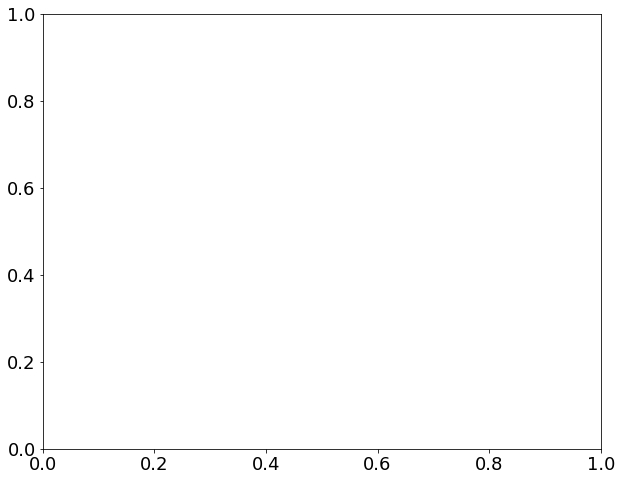

In [55]:
plt.figure(figsize=[10,8])
plt.scatter(lmc16['J']-lmc16['K'],jk_int_lin,c=lmc16['FE_H'],cmap='nipy_spectral')
plt.colorbar()
plt.plot([0.5,1.3],[0.5,1.3],c='k')
plt.title(r'''linest Neighbor''')
plt.xlabel(r'Observed (J - K)')
plt.ylabel(r'Interpolated (J - K)')
plt.show()

plt.figure(figsize=[10,8])
plt.scatter(lmc16['J']-lmc16['K'],lmc16['J']-lmc16['K']-jk_int_lin,c=lmc16['FE_H'],cmap='nipy_spectral')
plt.colorbar()
plt.axhline(0.0,c='k')
plt.title(r'''linest Neighbor''')
plt.xlabel(r'Observed (J - K)')
plt.ylabel(r'Observed - Interpolated (J - K)')
plt.show()

In [ ]:
griddata,LinearNDInterpolator,

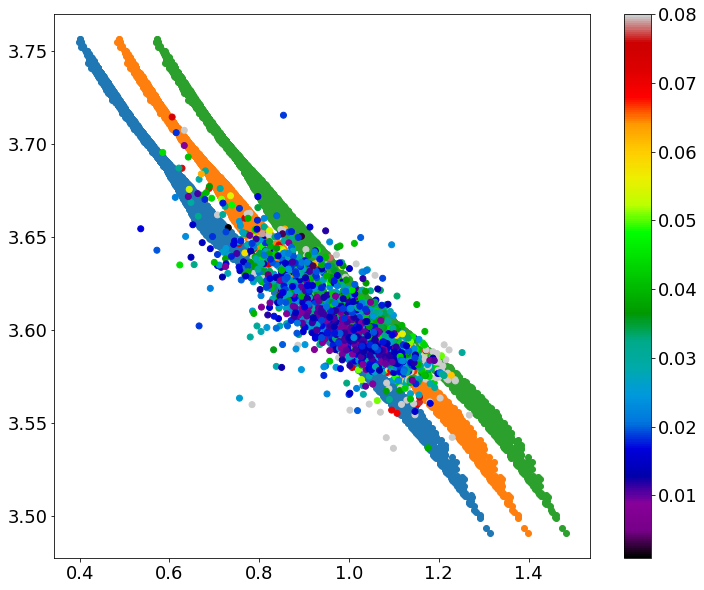

In [156]:
cln = np.where(lmc16['AK_TARG']>-9999.0)
plt.figure(figsize=[12,10])
plt.scatter(av0['Jmag']-av0['Ksmag'],av0['logTe'])
plt.scatter(av05['Jmag']-av05['Ksmag'],av05['logTe'])
plt.scatter(av1['Jmag']-av1['Ksmag'],av1['logTe'])
plt.scatter((lmc16['J']-lmc16['K'])[cln],np.log10(lmc16['Teff'])[cln],c=lmc16['AK_TARG'][cln],
            cmap='nipy_spectral',vmax=0.08)
plt.colorbar()

(0.0, 0.2)

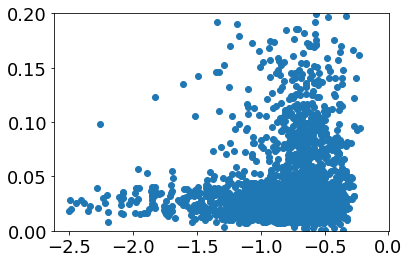

In [165]:
plt.scatter(lmc16['FE_H'],lmc16['AK_TARG'])
plt.ylim(0.0,0.2)

(0.0, 0.2)

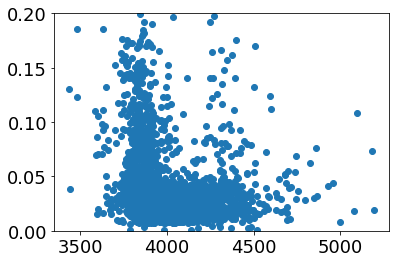

In [167]:
plt.scatter(lmc16['TEFF'],lmc16['AK_TARG'])
plt.ylim(0.0,0.2)

(0.0, 0.2)

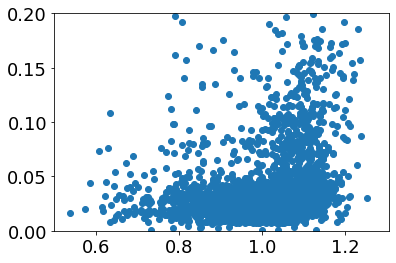

In [168]:
plt.scatter(lmc16['J']-lmc16['K'],lmc16['AK_TARG'])
plt.ylim(0.0,0.2)

(array([1.015e+03, 1.203e+03, 1.930e+02, 1.370e+02, 9.200e+01, 4.600e+01,
        3.700e+01, 2.500e+01, 7.000e+00, 1.000e+00, 7.000e+00, 3.000e+00,
        2.000e+00, 5.000e+00, 3.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00]),
 array([0.00091767, 0.02419044, 0.0474632 , 0.07073597, 0.09400874,
        0.1172815 , 0.14055428, 0.16382705, 0.18709981, 0.21037258,
        0.23364533, 0.2569181 , 0.28019089, 0.30346364, 0.32673642,
        0.35000917, 0.37328196, 0.3965547 , 0.4198275 , 0.44310024,
        0.46637303, 0.48964578, 0.51291853, 0.53619134, 0.5594641 ,
        0.58273685], dtype=float32),
 <a list of 25 Patch objects>)

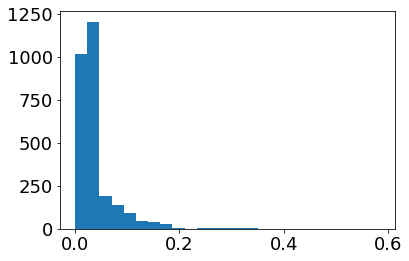

In [152]:
plt.hist(lmc16['AK_TARG'][np.where((lmc16['AK_TARG']>-9999.0)&(lmc16['AK_TARG']<4.))],bins=25)

In [154]:
np.median(lmc16['AK_TARG'])

array([0.20471378, 0.07210287, 0.23500776, ..., 0.01471772, 0.02064662,
       0.0195937 ], dtype=float32)

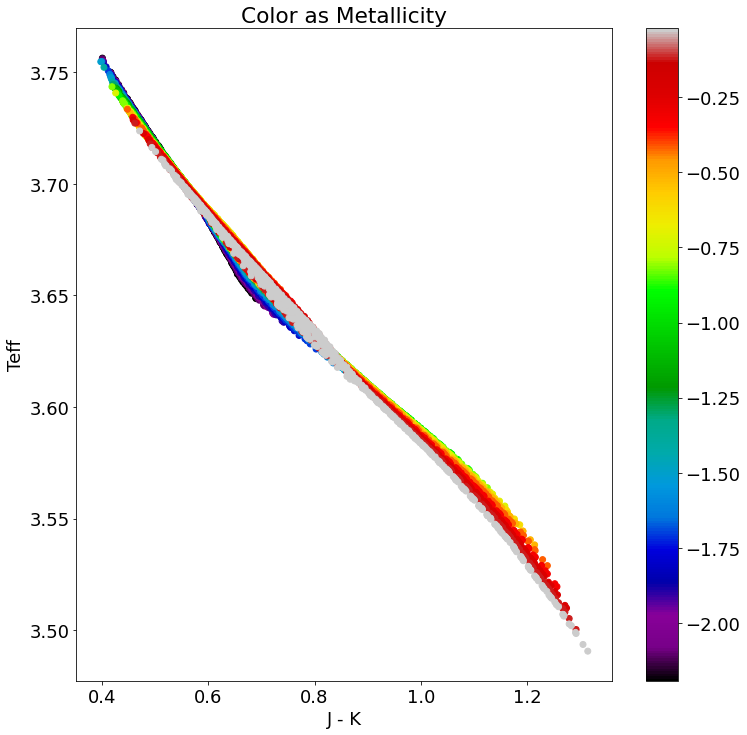

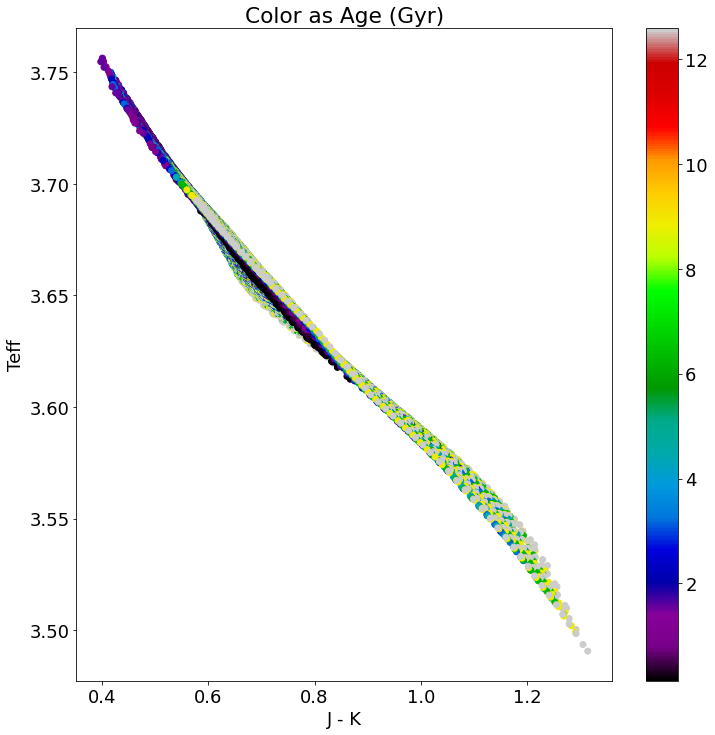

In [57]:
### Teff-Color-Metallicity
plt.figure(figsize=[12,12])
plt.scatter(av0['Jmag']-av0['Ksmag'],av0['logTe'],c=av0['MH'],cmap='nipy_spectral')
plt.colorbar()

plt.title(r'Color as Metallicity')
plt.xlabel(r'J - K')
plt.ylabel(r'Teff')

plt.show()

### Teff-Color-Age
plt.figure(figsize=[12,12])
plt.scatter(av0['Jmag']-av0['Ksmag'],av0['logTe'],c=10**av0['logAge']/10**9,cmap='nipy_spectral')
plt.colorbar()

plt.title(r'Color as Age (Gyr)')
plt.xlabel(r'J - K')
plt.ylabel(r'Teff')

plt.show()

In [59]:
np.diff(np.unique(av0['logAge']))

<Column name='logAge' dtype='float64' length=13>
0.15000000000000036
0.14999999999999858
0.15000000000000036
0.15000000000000036
0.15000000000000036
0.15000000000000036
0.14999999999999858
0.15000000000000036
0.15000000000000036
0.15000000000000036
0.15000000000000036
0.14999999999999858
0.14999000000000073

# Single Age

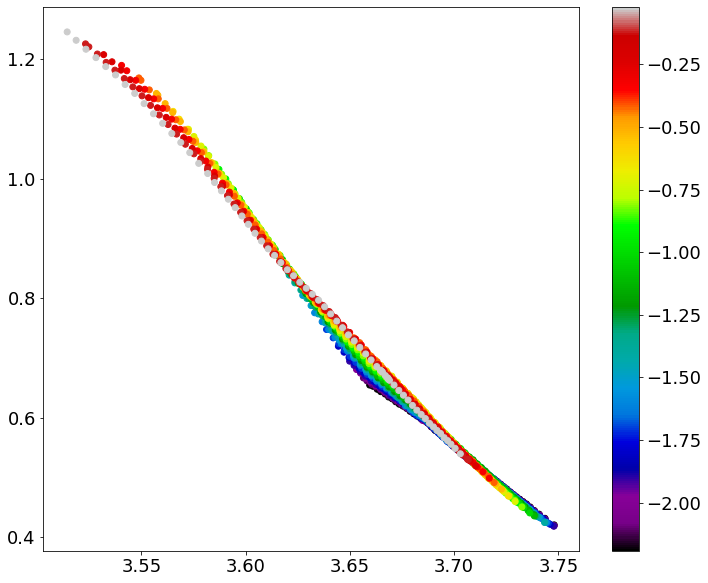

In [60]:
single_age = np.where(av0['logAge']==9.65)

av0_age = av0[single_age]

plt.figure(figsize=[12,10])
plt.scatter(av0_age['logTe'],av0_age['Jmag']-av0_age['Ksmag'],c=av0_age['MH'],cmap='nipy_spectral')
plt.colorbar()

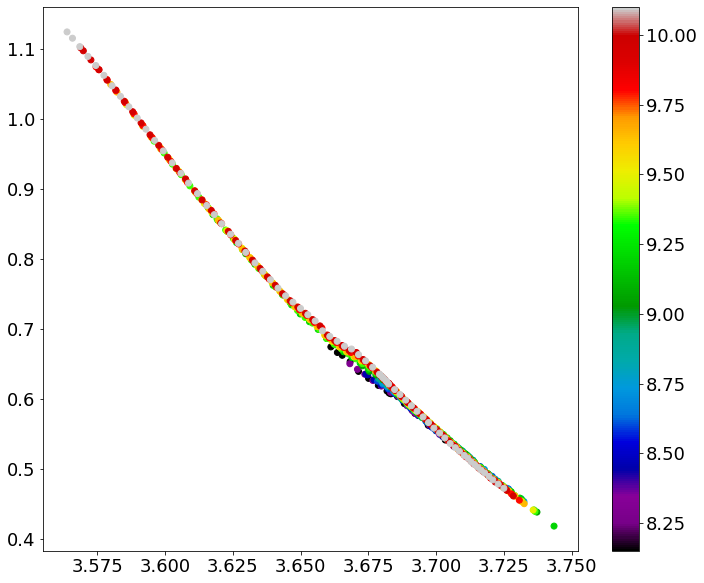

In [61]:
# feh_0814 = np.where(av0['MH']==-0.814)
# feh_2002 = np.where(av0['MH']==-0.814)
# feh_0022 = 

single_feh = np.where(av0['MH']==-0.814)
av0_feh = av0[single_feh]

plt.figure(figsize=[12,10])
plt.scatter(av0_feh['logTe'],av0_feh['Jmag']-av0_feh['Ksmag'],c=av0_feh['logAge'],cmap='nipy_spectral')
plt.colorbar()

In [62]:
np.unique(av0['MH'])

<Column name='MH' dtype='float64' length=23>
-2.1917400000000002
             -2.101
             -2.002
             -1.903
             -1.804
             -1.705
             -1.606
             -1.507
             -1.408
             -1.309
              -1.21
             -1.111
             -1.012
             -0.913
             -0.814
             -0.715
             -0.616
             -0.517
             -0.418
             -0.319
              -0.22
             -0.121
             -0.022

In [ ]:
si2 = np.argsort(iso2['logte'])
spl2 = interpolate.InterpolatedUnivariateSpline(iso2['logte'][si2],iso2['jmag'][si2]-iso2['ksmag'][si2])
logte_rnd2 = dln.randf(3.58,3.72,100)
jk_rnd2 = spl2(logte_rnd2)

In [ ]:
###

In [63]:
### 12e9 years
p12e9 = pd.read_csv('/Users/joshuapovick/Desktop/Research/parsec/parsec12e9.dat',comment='#',
                    names=["Zini","MH","logAge","Mini","int_IMF","Mass","logL","logTe","logg","label","McoreTP",
                           "C_O","period0","period1","period2","period3","period4","pmode","Mloss","tau1m","X",
                           "Y","Xc","Xn","Xo","Cexcess","Z","mbolmag","Gmag","G_BPmag","G_RPmag","B_Tmag",
                           "V_Tmag","Jmag","Hmag","Ksmag"],sep='\s+')
p12e9 = Table.from_pandas(p12e9)
rgb12e9 = np.where(p12e9['label']==3)
p12e9 = p12e9[rgb12e9]

### 5e9 years
p5e9 = pd.read_csv('/Users/joshuapovick/Desktop/Research/parsec/parsec5e9.dat',comment='#',
                   names=["Zini","MH","logAge","Mini","int_IMF","Mass","logL","logTe","logg","label","McoreTP",
                          "C_O","period0","period1","period2","period3","period4","pmode","Mloss","tau1m","X","Y",
                          "Xc","Xn","Xo","Cexcess","Z","mbolmag","Gmag","G_BPmag","G_RPmag","B_Tmag","V_Tmag",
                          "Jmag","Hmag","Ksmag"],sep='\s+')
p5e9 = Table.from_pandas(p5e9)
rgb5e9 = np.where(p5e9['label']==3)
p5e9 = p5e9[rgb5e9]

In [78]:
### lmc16[200]
single_met5 = np.where(p5e9['MH']==dln.closest(p5e9['MH'],-0.8)[0])
single_p5e9 = p5e9[single_met5]

single_met12 = np.where(p12e9['MH']==dln.closest(p12e9['MH'],-0.8)[0])
single_p12e9 = p12e9[single_met12]

In [95]:
from scipy.interpolate import InterpolatedUnivariateSpline

s5e9 = np.argsort(single_p5e9['logTe'])
s12e9 = np.argsort(single_p12e9['logTe'])

spl5e9 = InterpolatedUnivariateSpline(single_p5e9['logTe'][s5e9],
                                       (single_p5e9['Jmag']-single_p5e9['Ksmag'])[s5e9])
logte_rnd2 = dln.randf(3.58,3.72,100)
jk_rnd2 = spl5e9(logte_rnd2)

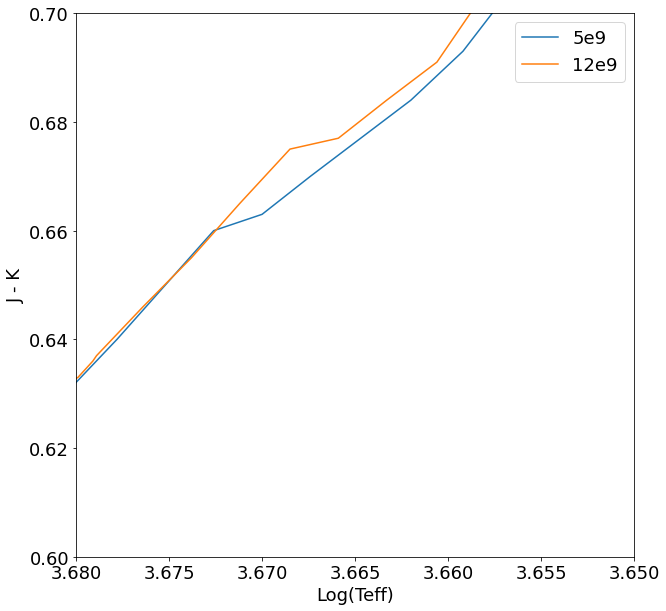

In [94]:
plt.figure(figsize=[10,10])
plt.plot(single_p5e9['logTe'][s5e9],(single_p5e9['Jmag']-single_p5e9['Ksmag'])[s5e9],label='5e9')
plt.plot(single_p12e9['logTe'][s12e9],(single_p12e9['Jmag']-single_p12e9['Ksmag'])[s12e9],label='12e9')
plt.legend()

plt.xlim(3.65,3.68)
plt.ylim(0.6,0.7)

plt.gca().invert_xaxis()
plt.xlabel(r'Log(Teff)')
plt.ylabel(r'J - K')
plt.show()

In [108]:
def parsec_jk_int(temp,feh,old_isochrone):
    '''
    Caluclate the intrinsic J-K color of a star from its temperature and [Fe/H]. 
    Depends on numpy and dlnpyutils.
    
    Inputs:
    ------
        temp = log10(temperature) of a star
        feh = metallicity of a star
        old_isochrone = set of parsec isochrones with a single old age and fine spread in [Fe/H]
         
    Outputs:
    -------
        jk = intrinsic J - K 
    '''
    
    # Pick Isochrone Metallicity 
    single_met = np.where(old_isochrone['MH']==dln.closest(old_isochrone['MH'],feh)[0])
    single_iso = old_isochrone[single_met]
    
    # Spline
    sidx = np.argsort(single_iso['logTe'])
    
    spl = InterpolatedUnivariateSpline(single_iso['logTe'][sidx],(single_iso['Jmag']-single_iso['Ksmag'])[sidx])
    
    jk = spl(temp)
    
    return jk

In [123]:
def closest(val,dat):
    '''
    find value closest to the given one
    
    Inputs:
    ------
        val: given value to find/get closest to
        dat: vals to search through
    '''
    val = np.asarray(val)
    dat = np.asarray(dat)
    
    abs_diff = np.abs(dat - val)
    return dat[abs_diff.argmin()]

def parsec_teff_2_jk(teff,feh,age,isochrones):
    # teff K
    # age Gyr
    
    single_iso = isochrones[np.where((isochrones['logAge']==closest(np.log10(age*10**9),isochrones['logAge']))&
                          (isochrones['MH']==closest(feh,isochrones['MH'])))]
    
    sidx = np.argsort(single_iso['logTe'])
    single_iso = single_iso[sidx]
    
    spl = InterpolatedUnivariateSpline(single_iso['logTe'],single_iso['Jmag']-single_iso['Ksmag'])
    
    jk = spl(np.log10(teff))
    return jk

In [122]:
np.where((p12e9['logAge']==closest(np.log10(12*10**9),p12e9['logAge']))&(p12e9['MH']==closest(-0.8,p12e9['MH'])))

(array([11194, 11195, 11196, 11197, 11198, 11199, 11200, 11201, 11202,
        11203, 11204, 11205, 11206, 11207, 11208, 11209, 11210, 11211,
        11212, 11213, 11214, 11215, 11216, 11217, 11218, 11219, 11220,
        11221, 11222, 11223, 11224, 11225, 11226, 11227, 11228, 11229,
        11230, 11231, 11232, 11233, 11234, 11235, 11236, 11237, 11238,
        11239, 11240, 11241, 11242, 11243, 11244, 11245, 11246, 11247,
        11248, 11249, 11250, 11251, 11252, 11253, 11254, 11255, 11256,
        11257, 11258, 11259, 11260, 11261, 11262, 11263, 11264]),)

In [124]:
parsec_teff_2_jk(4500,-0.8,12,p12e9)

array(0.71996299)

In [125]:
parsec_jk_int(np.log10(4500),-0.8,p12e9)

array(0.71996299)

In [115]:
np.log10(4500)

3.6532125137753435

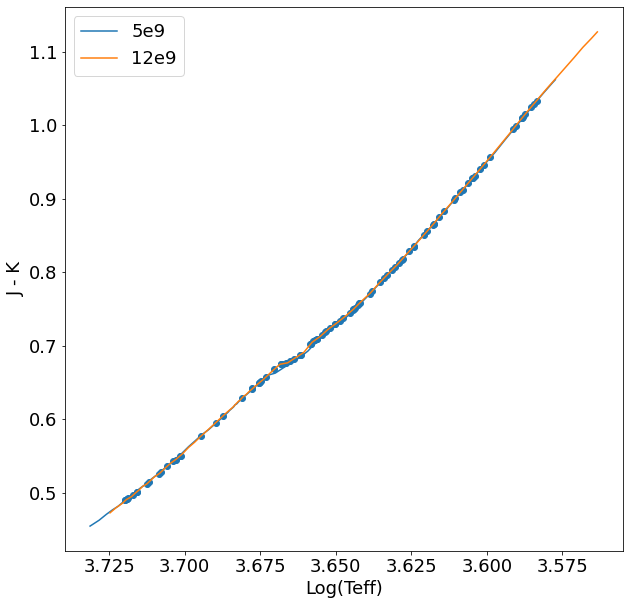

In [114]:
logte_rnd = dln.randf(3.58,3.72,100)
jk_rnd = []
for i in range(len(logte_rnd)):
    jk_rnd.append(parsec_jk_int(logte_rnd[i],-0.8,p12e9))

plt.figure(figsize=[10,10])
plt.plot(single_p5e9['logTe'][s5e9],(single_p5e9['Jmag']-single_p5e9['Ksmag'])[s5e9],label='5e9')
plt.plot(single_p12e9['logTe'][s12e9],(single_p12e9['Jmag']-single_p12e9['Ksmag'])[s12e9],label='12e9')
plt.scatter(logte_rnd,jk_rnd)
plt.legend()

plt.gca().invert_xaxis()
plt.xlabel(r'Log(Teff)')
plt.ylabel(r'J - K')
plt.show()

In [87]:
min(np.diff(single_p12e9['logTe'][s12e9]))

0.00019999999999997797

In [464]:
np.where(np.diff(p12e9['logTe'][np.argsort(p12e9['logTe'])])==0)

(array([   19,    26,    37, ..., 12631, 12633, 12635]),)

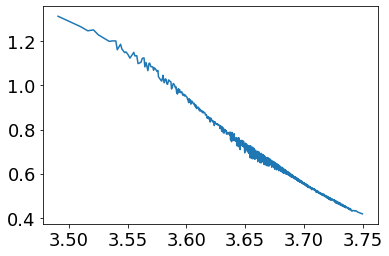

In [465]:
plt.plot(p12e9['logTe'][s12e9],(p12e9['Jmag']-p12e9['Ksmag'])[s12e9])

In [495]:
np.unique(p12e9['logAge'])

<Column name='logAge' dtype='float64' length=14>
    8.15
     8.3
    8.45
     8.6
    8.75
     8.9
    9.05
     9.2
    9.35
     9.5
    9.65
     9.8
    9.95
10.09999

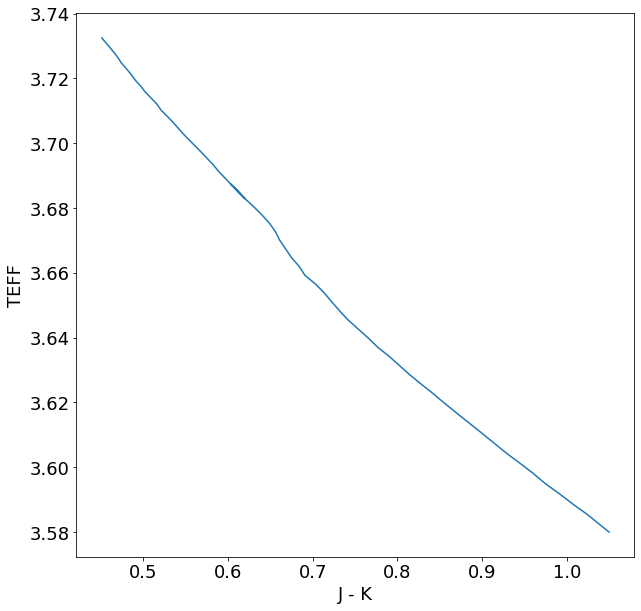

In [494]:
single = np.where((av0['logAge']==9.65)&(av0['MH']==-0.814))

# sin_arr = np.array((av0['Jmag']-av0['Ksmag'])[single]).T

# sin_int = idw(sin_arr,av0['logTe'][single])

# rand_col = []
# for i in range(100):
#     rand_col.append(np.random.uniform(min((av0['Jmag']-av0['Ksmag'])[single]),
#                                           max((av0['Jmag']-av0['Ksmag'])[single])))

# pred_col = np.asarray(sin_int(rand_col))

plt.figure(figsize=[10,10])
plt.plot((av0['Jmag']-av0['Ksmag'])[single],av0['logTe'][single],label='9.65; -0.814')
# plt.scatter(rand_col,pred_col,c='r')

plt.ylabel(r'TEFF')
plt.xlabel(r'J - K')
plt.show()